<a href="https://colab.research.google.com/github/emmaafarrington/UT_AI-MachineLearning/blob/Personal-Projects/MachineLearningPersonalLoanCampaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
#Remove Warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

#setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format",lambda x: '%.5f' % x)

# To build model for prediction

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores


from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Loading the dataset

In [ ]:
# load google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the dataset
loan_main = pd.read_csv("/content/drive/MyDrive/AI & Machine Learning/Loan_Modelling.csv")

In [ ]:
# copying to another variable to avoid changes to the original dataset
data = loan_main.copy()

## Data Overview

In [ ]:
# top 5 rows of the data
data.head()

ID  Age  Experience  Income  ZIPCode  Family   CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4 1.60000          1         0   
1   2   45          19      34    90089       3 1.50000          1         0   
2   3   39          15      11    94720       1 1.00000          1         0   
3   4   35           9     100    94112       1 2.70000          2         0   
4   5   35           8      45    91330       4 1.00000          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [ ]:
# last 5 rows of data
data.tail()

ID  Age  Experience  Income  ZIPCode  Family   CCAvg  Education  \
4995  4996   29           3      40    92697       1 1.90000          3   
4996  4997   30           4      15    92037       4 0.40000          1   
4997  4998   63          39      24    93023       2 0.30000          3   
4998  4999   65          40      49    90034       3 0.50000          2   
4999  5000   28           4      83    92612       3 0.80000          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

* The ID Column contains unique values.
* There are 3 types of education -  1: Undergrad; 2: Graduate;3: Advanced/Professional.

In [ ]:
# shape of the data set
print (f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 5000 rows and 14 columns.


In [ ]:
#checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* The columns are all numeric.

In [ ]:
# checking for null values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64



*   There are no null values in the dataset.


In [ ]:
# checking for duplicate values
data.duplicated().sum()

0

*   There are no duplicate values in the dataset.


In [ ]:
# checking number of unique values in each column
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

* We can see that there are 5000 unique 'ID' values, which means this column does not add any value to the analysis and can be dropped.

In [ ]:
# dropping the ID column
data = data.drop(["ID"], axis=1)

In [ ]:
# getting the statistical summary of the data
data.describe().T

count        mean        std         min         25%  \
Age                5000.00000    45.33840   11.46317    23.00000    35.00000   
Experience         5000.00000    20.10460   11.46795    -3.00000    10.00000   
Income             5000.00000    73.77420   46.03373     8.00000    39.00000   
ZIPCode            5000.00000 93169.25700 1759.45509 90005.00000 91911.00000   
Family             5000.00000     2.39640    1.14766     1.00000     1.00000   
CCAvg              5000.00000     1.93794    1.74766     0.00000     0.70000   
Education          5000.00000     1.88100    0.83987     1.00000     1.00000   
Mortgage           5000.00000    56.49880  101.71380     0.00000     0.00000   
Personal_Loan      5000.00000     0.09600    0.29462     0.00000     0.00000   
Securities_Account 5000.00000     0.10440    0.30581     0.00000     0.00000   
CD_Account         5000.00000     0.06040    0.23825     0.00000     0.00000   
Online             5000.00000     0.59680    0.49059     0.00000     0.00000   
CreditCard         5000.00000     0.29400    0.45564     0.00000     0.00000   

                           50%         75%         max  
Age                   45.00000    55.00000    67.00000  
Experience            20.00000    30.00000    43.00000  
Income                64.00000    98.00000   224.00000  
ZIPCode            93437.00000 94608.00000 96651.00000  
Family                 2.00000     3.00000     4.00000  
CCAvg                  1.50000     2.50000    10.00000  
Education              2.00000     3.00000     3.00000  
Mortgage               0.00000   101.00000   635.00000  
Personal_Loan          0.00000     0.00000     1.00000  
Securities_Account     0.00000     0.00000     1.00000  
CD_Account             0.00000     0.00000     1.00000  
Online                 1.00000     1.00000     1.00000  
CreditCard             0.00000     1.00000     1.00000

### Observations

* The average age of indiviuals in the data set is about 45 years, and age range spans from 23-67 years.
*  On average, individuals have 20.10 years of experience.
* The mean of income is 73,770 dollars and the median is 64,000 dollars, which indicates a right-skewed distribution.
* Family has a relatively symmetric distribution with minimal skewness, typical family size being about 2.
* CCAvg is right-skewed and there are people who don't spend anything on credit cards monthly.
* Education appears to be eventy distributed.
* Mortgage has a right-skewed distribution indicating high mortgage rates or presence of outliers.



### Sanity checks
* Experience column, shows that minimum experience is -3 years, which could be a data entry error that we should look into that further.

## Data Preprocessing

**Checking for Anomalous Values**

In [ ]:
# Mapping education values to 1=Undergrad, 2=Graduate, 3= Advanced/Professional
data["Education"].replace(1, "Undergraduate", inplace=True)
data["Education"].replace(2, "Graduate", inplace=True)
data["Education"].replace(3, "Professional", inplace=True)

In [ ]:
# checking if experience <0
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])



*   We can assume that the negative signs are input errors within the data so we will replace them with positive values.



In [ ]:
# Correcting the experience values to avoid negatives
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

**Feature Engineering**

In [ ]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

* There are 467 unique zip codes.

In [ ]:
#taking last 2 numbers of zip codes
data["ZIPCode"] = data["ZIPCode"].astype(str)
print("Number of unique values if we take first two digits of ZIPCode: ", data["ZIPCode"].str[0:2].nunique(),)
data["ZIPCode"] = data["ZIPCode"].str[0:2]
data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [ ]:
## Converting the data type of categorical features to 'category'
cat_cols = ["Education","Personal_Loan","Securities_Account","CD_Account","Online","CreditCard","ZIPCode",]

data[cat_cols] = data[cat_cols].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.8 KB


* The majority of the columns have been converted to the category (7) data type.
* The remaining columns are integer (5) and float (1) data types.
* All columns have non-null values, indicating that there are no missing values.
* This data preprocessing step will prepare the dataset for further analysis.

## Exploratory Data Analysis.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
 * Explanation in analysis
2. How many customers have credit cards?
  * 1470
  * Explanation in analysis

3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
 * Income, Family, Education Level - 3 strongest correlations
 * CCAvg / CD account- has some influence
 **Explanation for each throughout analysis*
4. How does a customer's interest in purchasing a loan vary with their age?
  * It does not appear that age has much of an impact on whether or not they purchase a loan or not.
  * Question answered in analysis
5. How does a customer's interest in purchasing a loan vary with their education?
 * Question answered in analysis

## Univariate Analysis

In [ ]:
#function to plot a boxplot and a histogram along the same scale
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Age

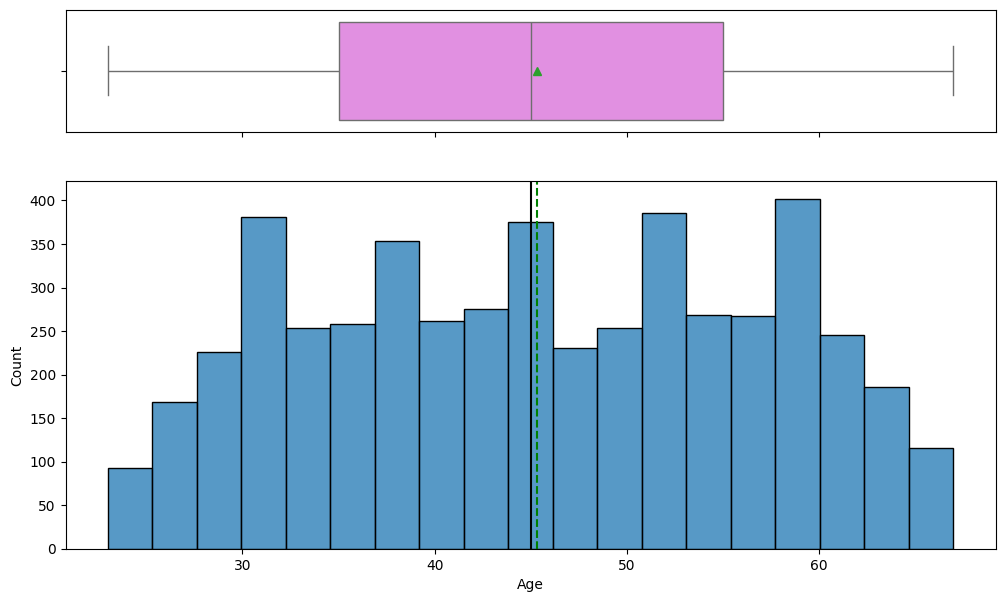

In [ ]:
# histogram and boxplot for Age data
histogram_boxplot(data, "Age")

* The youngest person in the dataset is 23 years old and the oldest person in the data set is 67 years old.
* There are no outliers present.
* The distribution appears multimodal with some variability. It is not highly skewed one way (extremely slight right-skew), but there are distinct clusters where the frequency of observations are higher.
* The mean age is around 45 years old, and there are peaks at ~31, ~39, ~52, and ~59.

#### Observations on Experience

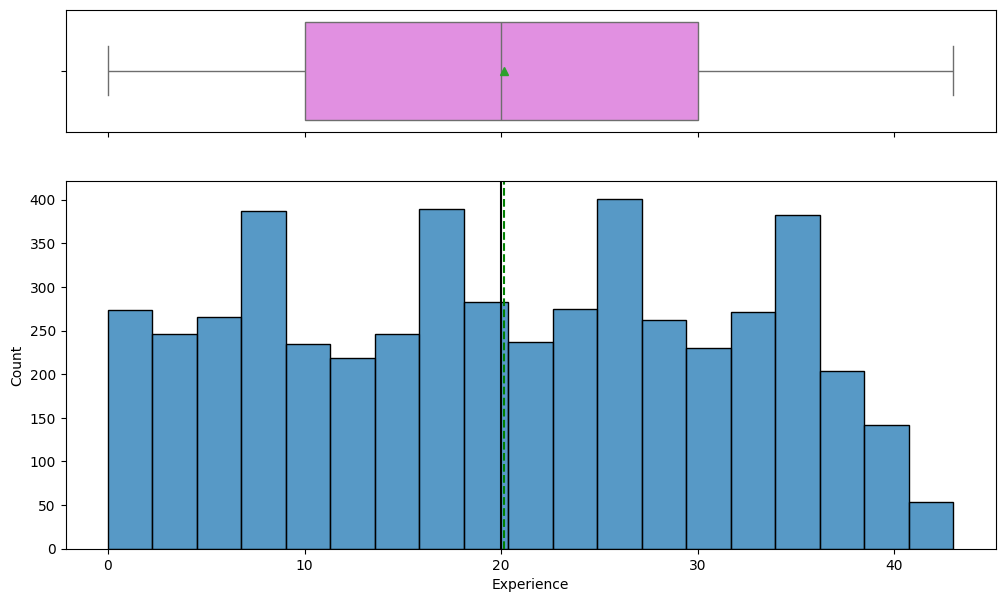

In [ ]:
# histogram and boxplot for Experience data
histogram_boxplot(data, 'Experience')

* Similarly to age, the distribution appears multimodal with some variability. It is not highly skewed one way (has an extremely slight right-skew), but there are distinct clusters where the frequency of observations are higher. This would make sense that there are peaks of experience level in a similar distribution as age.
* Customers have around 20 years of work experience on average.
* Some customers have 0 years of work experience.
* There are no outliers.

#### Observations on Income

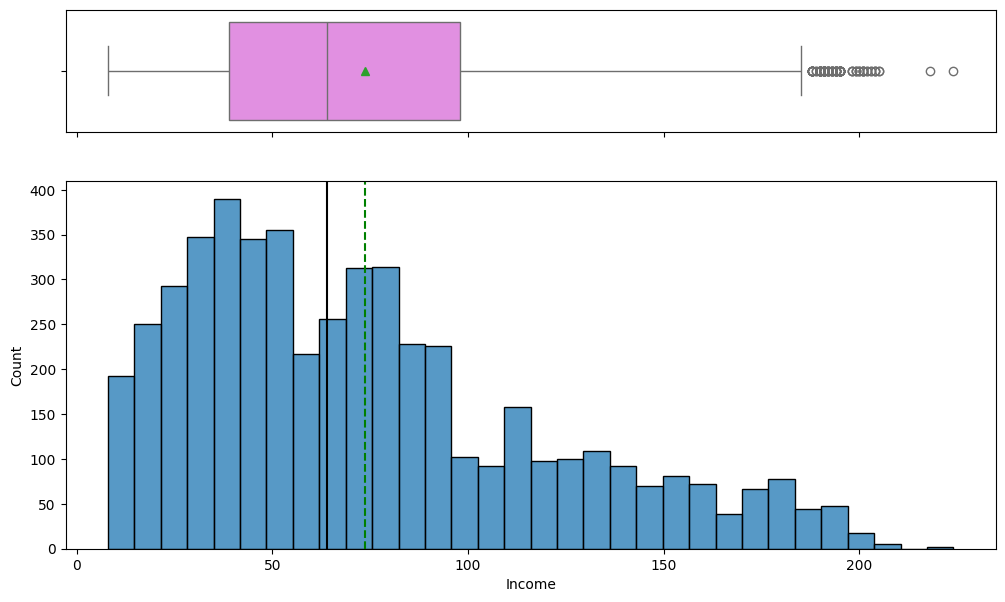

In [ ]:
# histogram and boxplot for Income data
histogram_boxplot(data, 'Income')

* The income amount is right skewed with many outliers above the upper quartile.
* This suggests some of the customers are making a significantly higher amount of money annually than others.

#### Observations on CCAvg

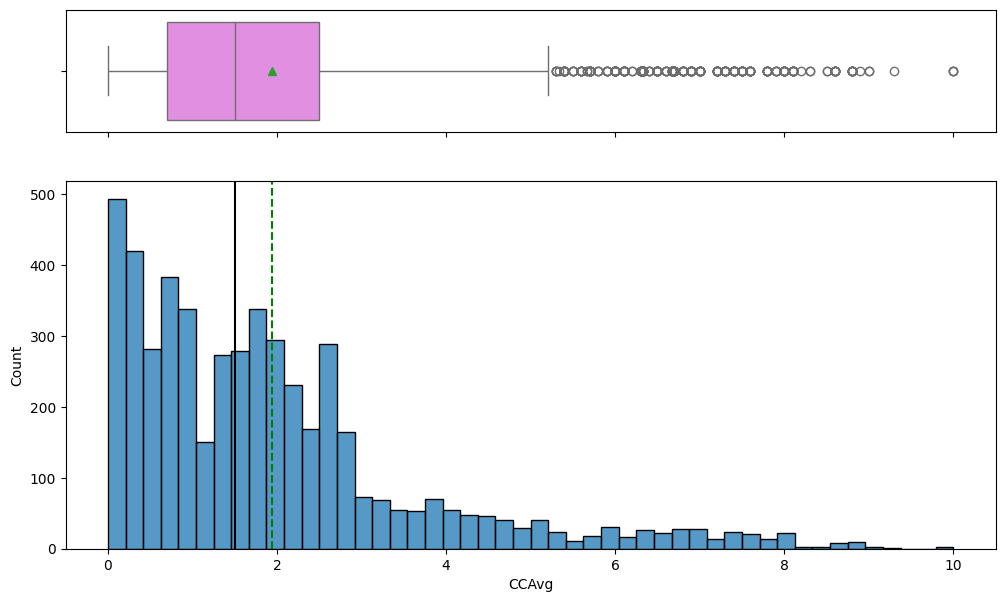

In [ ]:
# histogram and boxplot for CCAavg data - CCAvg is in thousands of dollars
histogram_boxplot(data, "CCAvg")

* The average CC spending monthly is right skewed with many outliers on the upper quartile.
* This suggests some customers are spending significantly more, with the highest monthly spending amount being $10,000.
* The lowest spending amount was 0 dollars, which also appears to be the most frequent amount, suggesting many customers don't use their credit card.

#### Observations on Mortgage

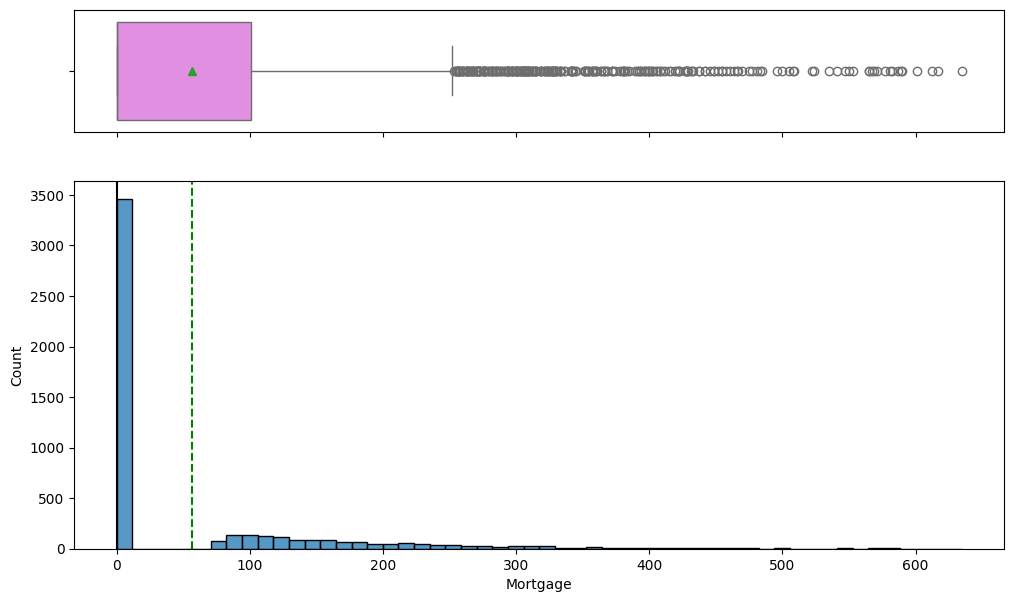

In [ ]:
# histogram and boxplot for Mortgage data - Mortgage is in thousands of dollars
histogram_boxplot(data, 'Mortgage')

In [ ]:
# Finding outliers in the data

# Calculate quartiles
Q1 = np.percentile(data['Mortgage'], 25)
Q3 = np.percentile(data['Mortgage'], 75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier thresholds
upper_bound_mort = Q3 + 1.5 * IQR
lower_bound_mort = Q1 - 1.5 * IQR

# Find outliers
outliers_mort = data[(data['Mortgage'] < lower_bound_mort) | (data['Mortgage'] > upper_bound_mort)]

print(type(outliers_mort))
outliers_mort.sort_values(by='Mortgage', ascending=True)

<class 'pandas.core.frame.DataFrame'>


Age  Experience  Income ZIPCode  Family   CCAvg      Education  \
3948   37          12     123      94       4 3.10000       Graduate   
2159   61          35      99      94       1 4.80000   Professional   
3138   36          11     103      93       1 4.60000  Undergraduate   
3950   38          14      62      94       1 1.50000   Professional   
935    46          20     131      95       1 5.70000  Undergraduate   
...   ...         ...     ...     ...     ...     ...            ...   
4842   49          23     174      95       3 4.60000       Graduate   
1783   53          27     192      94       1 1.70000  Undergraduate   
4812   29           4     184      92       4 2.20000   Professional   
303    49          25     195      95       4 3.00000  Undergraduate   
2934   37          13     195      91       2 6.50000  Undergraduate   

      Mortgage Personal_Loan Securities_Account CD_Account Online CreditCard  
3948       253             1                  0          1      1          1  
2159       255             1                  0          0      0          1  
3138       255             0                  0          0      1          0  
3950       255             0                  0          0      1          0  
935        256             0                  0          0      0          1  
...        ...           ...                ...        ...    ...        ...  
4842       590             1                  0          0      0          0  
1783       601             0                  0          0      1          0  
4812       612             1                  0          0      1          0  
303        617             1                  0          0      0          0  
2934       635             0                  0          0      1          0  

[291 rows x 13 columns]

In [ ]:
# getting the statistical summary of the data
mortgage_summary = data['Mortgage'].describe()

print(mortgage_summary)

count   5000.00000
mean      56.49880
std      101.71380
min        0.00000
25%        0.00000
50%        0.00000
75%      101.00000
max      635.00000
Name: Mortgage, dtype: float64


###**Question 1: What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?**

* This graph is extremely right skewed.
* Approximately 75% of customers have a mortgage value of $101,000 or less and the median and 25th percentile values are both 0, suggesting that a significant portion of customers do not have a mortgage.


* There is a considerable amount of variability in mortgage values as indicated by a very large standard deviation.

**Outliers:**
* The average mortgage amount is 56,4900 dollars but the median is $0.00, suggesting outliers have a significant impact on the mean.
*  This results in 291 outliers, with the first outlier having a mortgage of 253,000 dollars and the last outlier having a mortgage of 635,000 dollars.


**Conclusion:**
* Overall, the data suggests that while many customers do not have a mortgage, those who do exhibit a wide range of mortgage values, with the majority having relatively low mortgage amounts.

#### Observations on Family

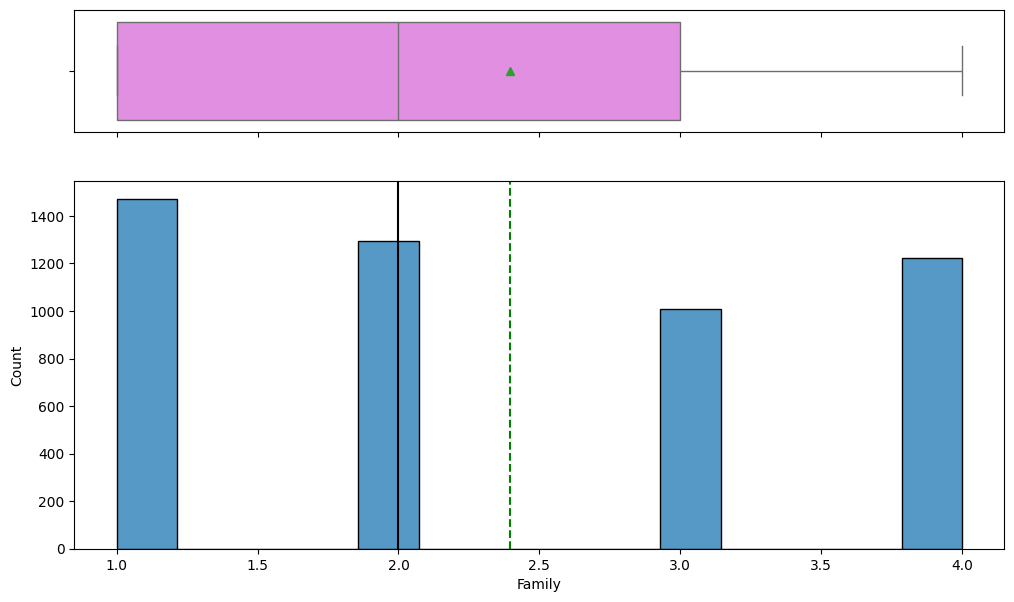

In [ ]:
# histogram and box plot for family size
histogram_boxplot(data, 'Family')

* The highest number of observations come from families of 1 (individuals), and the range is from 1-4 family members.  
* The average family size is around 2.4, and the median is 2
* The data is right skewed with no outliers present.

#### Observations on Education

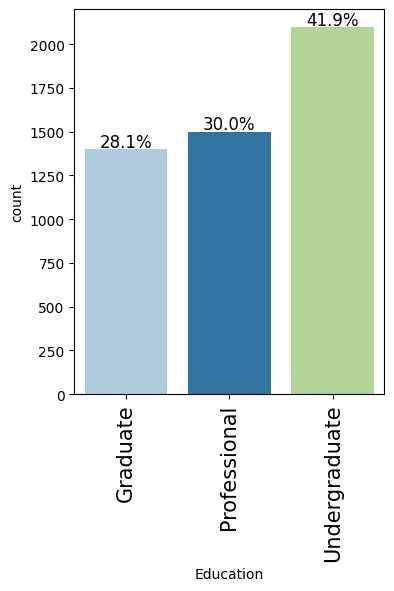

In [ ]:
# barplot on levels of education
labeled_barplot(data, 'Education', perc=True)

* 41.9% of customers have undergraduate degrees
* 30% have professional/advanced degrees
* 28.1% have graduate degrees.

#### Observations on Securities_Account

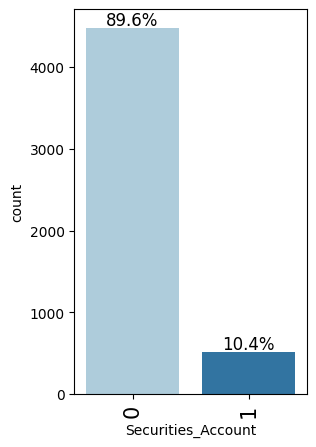

In [ ]:
#barplot for securities account
labeled_barplot(data, 'Securities_Account', perc=True)

* About 10% of customers have a securities account with the bank and 90% do not.

#### Observations on CD_Account

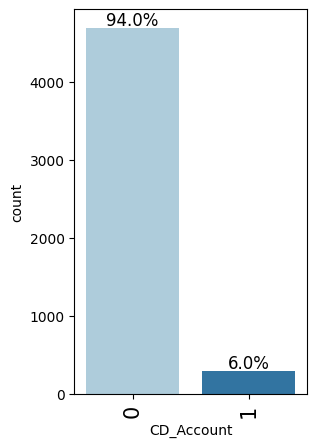

In [ ]:
#barplot for customers who have certificate of deposit accounts
labeled_barplot(data, 'CD_Account', perc=True)

* Only 6% of customers have a certificate of deposit account while 94% do not.

#### Observations on Online

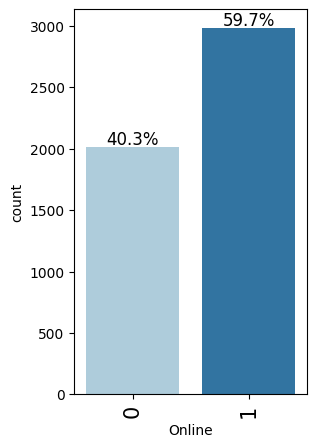

In [ ]:
# barplot for whether customers use online banking
labeled_barplot(data, 'Online', perc=True)

* 59.7% of customers use online banking and 40.3% do not.

#### Observations on CreditCard

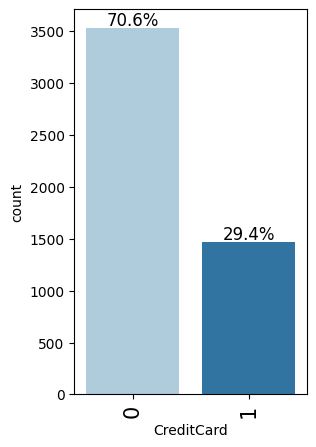

In [ ]:
# barplot for whether customers have credit cards
labeled_barplot(data, 'CreditCard',perc=True)

* 29.4% of people have credit cards from other banks and 70.6% do not.

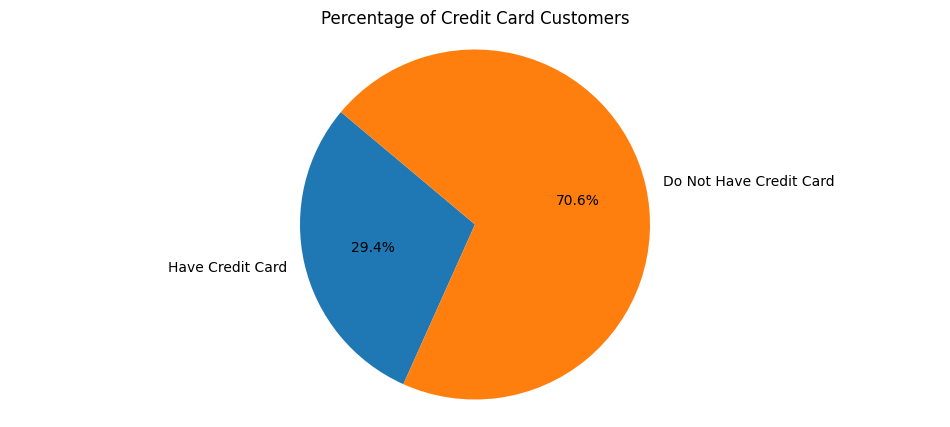

In [ ]:
# Calculate value counts
credit_card_counts = data['CreditCard'].value_counts()

# Calculate percentage of users who have credit cards
credit_card_percentage = credit_card_counts[1] / credit_card_counts.sum() * 100

# Create a pie chart
plt.figure(figsize=(12, 5))
plt.pie([credit_card_percentage, 100 - credit_card_percentage], labels=['Have Credit Card', 'Do Not Have Credit Card'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Credit Card Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

* We can see that there are significantly more customers that do not have credit cards than customers that do.
* 70.6% of customers do not have a credit cards.

###**Question 2: How many customers have credit cards?**


In [ ]:
# Calculate the number of customers that have credit cards
num_customers_with_credit_card = data['CreditCard'].cat.codes.sum()

print("Number of customers that have credit cards:", num_customers_with_credit_card)

Number of customers that have credit cards: 1470


* There are 1470 customers that have credit cards.


#### Observations on ZipCode

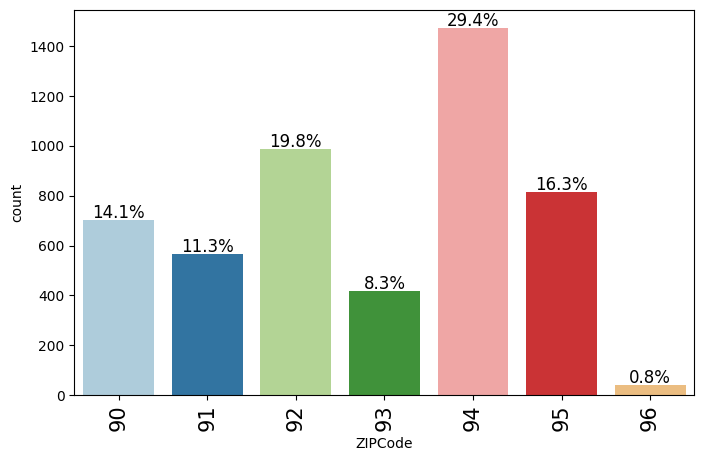

In [ ]:
# percentage barplot for distribution across zipcodes
labeled_barplot(data, 'ZIPCode', perc=True)

* ZIP94 is has the highest percentage of customers followed by ZIP92.
* ZIP96 has a very small number of customers with less than 1%.

## Bivariate Analysis

In [ ]:
# function to plot stacked barplot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

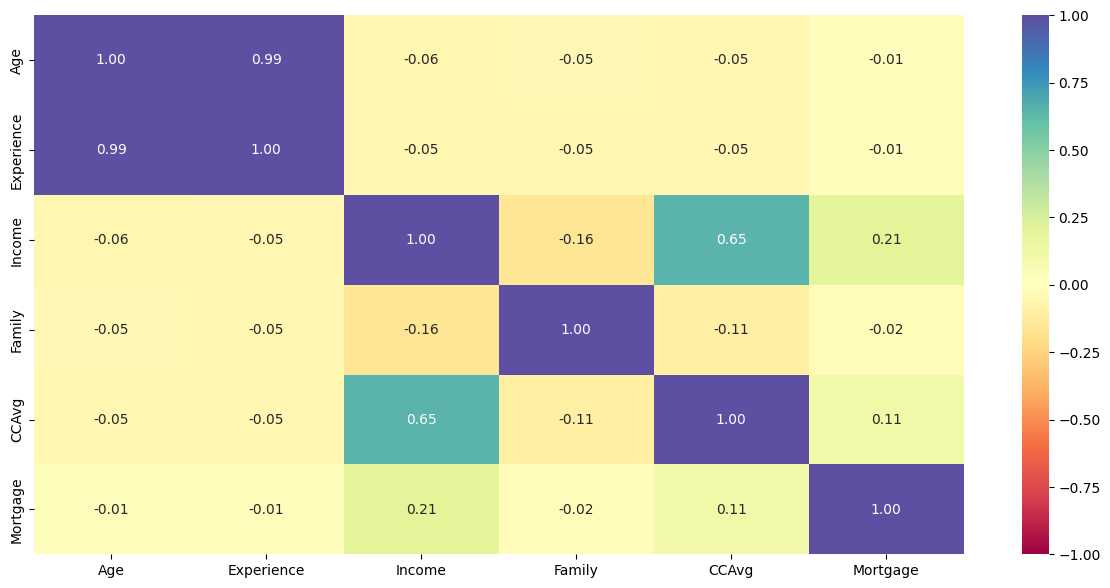

In [ ]:
# correlation heatmap
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()



*   There is a very strong positive correlation between experience and age.
*   There is a moderately positive correlation between income and CCAvg (amount spend on credit card monthly).
* No other variables are correlated. We will analyze this further.



#### Personal Loan vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergraduate  2003   93  2096
------------------------------------------------------------------------------------------------------------------------


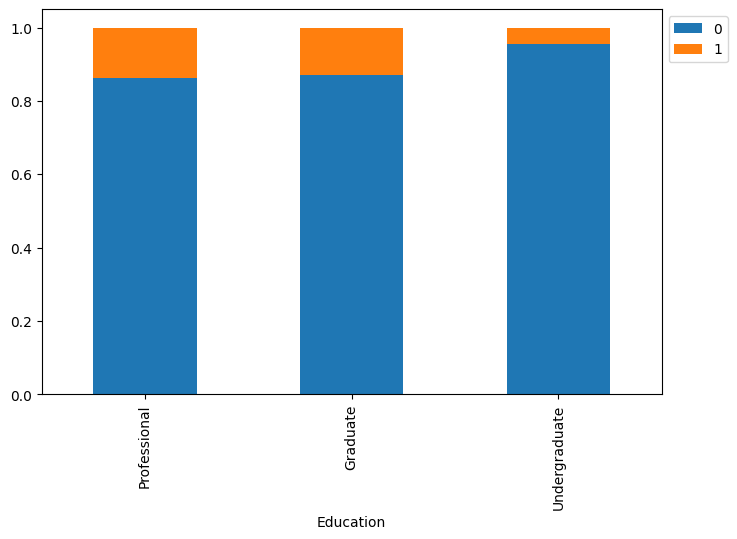

In [ ]:
# distribution of customers based on their education level and their acceptance or rejection of personal loans
stacked_barplot(data, "Education", "Personal_Loan")
plt.show()

###**Question 5: How does a customer's interest in purchasing a loan vary with their education?**
#####**Observations:**
* Customers with Undergraduate degrees tend to reject personal loans the most, with only 93 out of 2096 accepting them.
* Customers Professional/Advanced degrees are more likely to accept personal loans, with 205 out of 1501 accepting them.
* Customers with Graduate degrees fall in between, with 182 out of 1403 accepting personal loans.

##### **Conclusions:**
* This suggests that education level influences the likelihood of accepting personal loans, with customers with Professional/Advanced degrees being the most likely to accept, and customers with Undergraduate degrees being most likely to reject.
* This is understandable, as personal loans can be useful when it comes to paying for education expenses such as tuition fees, textbooks, or other materials. The higher the level of education, the more expenses they will have incurred that may require a loan to pay off.



#### Personal Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


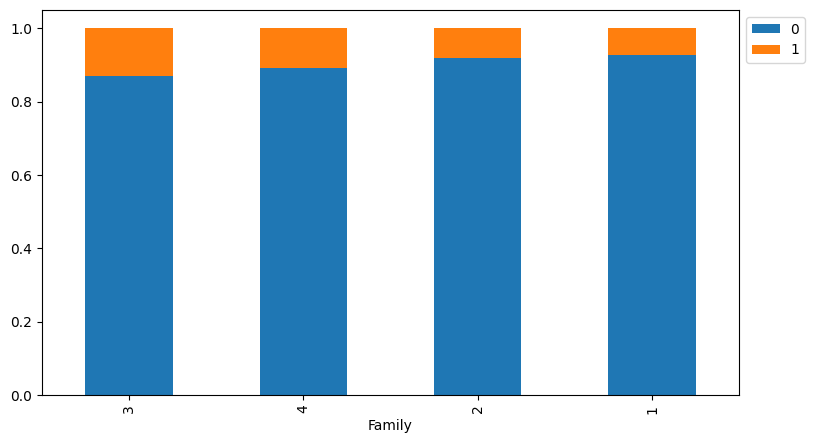

In [ ]:
# distribution of customers based on their family size and whether they accepted or rejected a personal loan
stacked_barplot(data, "Family", "Personal_Loan")

#####**Observations:**
* Families with four members seem to be more likely to accept personal loans compared to other family sizes, with around an 11% acceptance rate.
* Families with smaller sizes (one, two, or three members) have a relatively higher proportion of rejections compared to acceptances.

#####**Conclusions:**
* It makes sense that customers with larger families would be more likely to accept a loan. Having children could lead to extra expenses such as home expansion, college tuition, medical expenses, etc, which a personal loan could assist in financing.
* If the bank wants to encourage smaller families to take a personal loan, they may need to adjust their marketing strategies or loan offerings to better serve to the needs and preferences of families with different sizes.

#### Personal Loan vs Securities Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


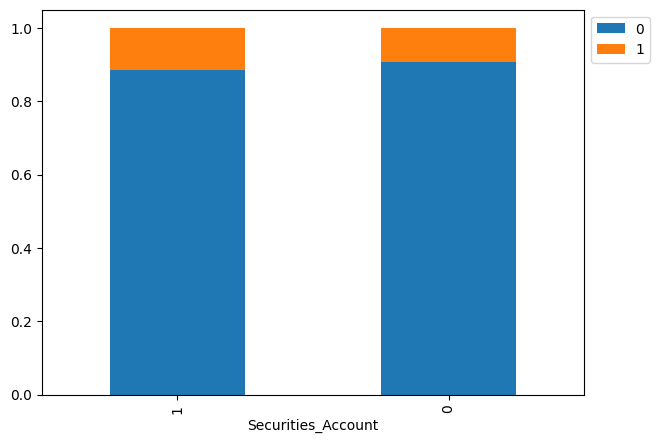

In [ ]:
# distribution of customers based on if they have a securities account and whether they accepted or rejected a personal loan
stacked_barplot(data, "Securities_Account", "Personal_Loan")

#####**Observations**
* Among customers who don't have a securities account, about 90.7% rejected personal loans, and about 9.3% accepted them.
* Among customers with a securities account, about 88.5% rejected personal loans, while about 11.5% accepted them.

#####**Conclusions:**
* Customers without securities accounts appear slightly more likely to reject personal loans compared to those with securities accounts. However, it is likely that having a securities account doesn't significantly alter the likelihood of accepting personal loans, as both groups have relatively similar acceptance rates.

#### Personal Loan vs Certificate of Deposit Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


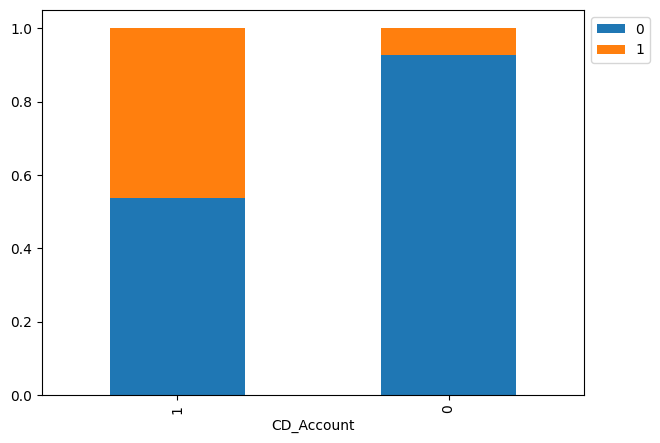

In [ ]:
# distribution of customers based on if they have a certificate of deposit account and whether they accepted or rejected a personal loan
stacked_barplot(data, "CD_Account", "Personal_Loan")

#####**Observations:**
* Out of all of the customers, 90.4% did not accept the personal loan, while 9.6% customers did.
* Among customers without a CD account, 92.8% declined the personal loan, and 7.2% accepted it.
* Among customers with a CD account, 53.6% declined the personal loan, while 46.3% accepted it.
* The acceptance rate for personal loans appears to be significantly higher among customers with a CD account compared to those without.

#####**Conclusions:**
* Overall, having a CD account seems to have some influence on the likelihood of accepting a personal loan. This may be influenced by the fact that they have put funds in their CD account and do not want to withdraw any funds earlier as to keep the interest rates up in the CD account and not recieve penalties for early withdrawal.

#### Personal Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


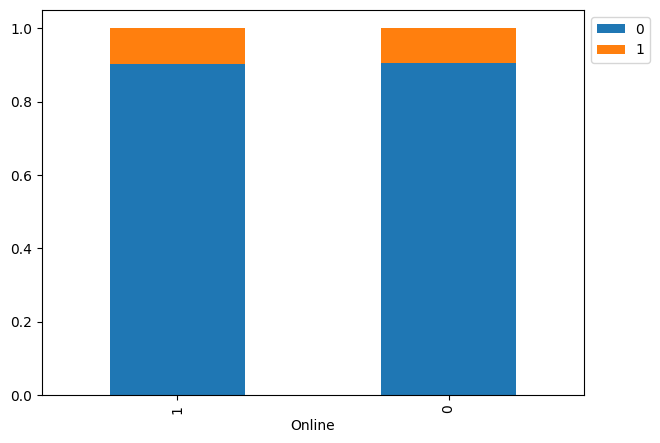

In [ ]:
# distribution of customers based on if they use internet banking facilities and whether they accepted or rejected a personal loan
stacked_barplot(data, "Online", "Personal_Loan")

#####**Observations:**
 * Approximately 90.24% of online banking users did not accept the personal loan, while approximately 9.76% accepted it

 * Approximately 90.65% of customers who do not use online banking did not accept the personal loan, while approximately 9.35% accepted it.

#####**Conclusions:**
 * Overall, there is a slightly higher acceptance rate for personal loans among customers who do not use online banking compared to those who do. However, the difference is so small that it is unlikely that whether they use internet banking facilities has any influence on whether they accept or reject a personal loan.


#### Personal Loan vs Credit Card

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


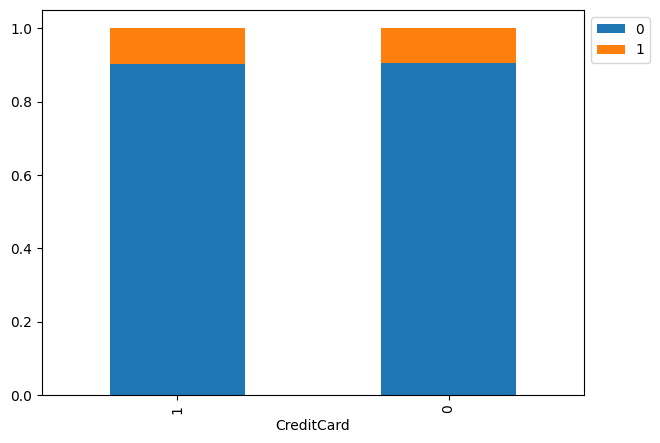

In [ ]:
# distribution of customers based on if they have a credit card and whether they accepted or rejected a personal loan
stacked_barplot(data, "CreditCard", "Personal_Loan")

#####**Observations:**

* Approximately 90.45% of customers who do not use a credit card did not accept the personal loan, while approximately 9.55% accepted it

* Approximately 90.20% of customers who use a credit card issued by another bank did not accept the personal loan, while approximately 9.80% accepted it.

#####**Conclusions:**
* There is a slightly higher acceptance rate for personal loans among customers who do not use a credit card compared to those who do, but the difference is so small that it is unlikely that this factor has any influence on whether they accept or reject a personal loan.
* A factor to be considered is that, given that the it is being used responsibly, personal loans can be useful for building or improving credit score, making it easier to qualify for future loans with better terms.

#### Personal Loan vs Zipcode

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


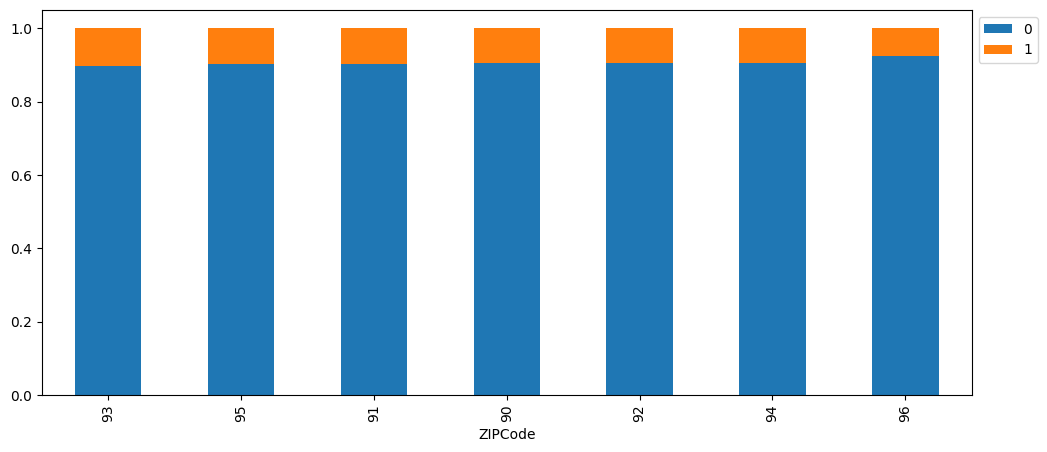

In [ ]:
# distribution of customers based on what zip code they live in and whether they accepted or rejected a personal loan
stacked_barplot(data, "ZIPCode", "Personal_Loan")

#####**Observations:**
* ZIPCode 94 has the highest number of customers, with approximately 90.61% rejecting the personal loan.
* ZIPCode 96 has the lowest number of customers, with approximately 92.50% rejecting the personal loan.

#####**Conclusions:**
* There are slight variations in acceptance rates across different ZIP codes, ranging from approximately 89.70% to 92.50%, but all acceptance rates are pretty similar across all zip codes. Therefore, it is unlikely that the ZIP code has significant influence on the acceptance or rejection of a personal loan.

#### Personal Loan vs Age

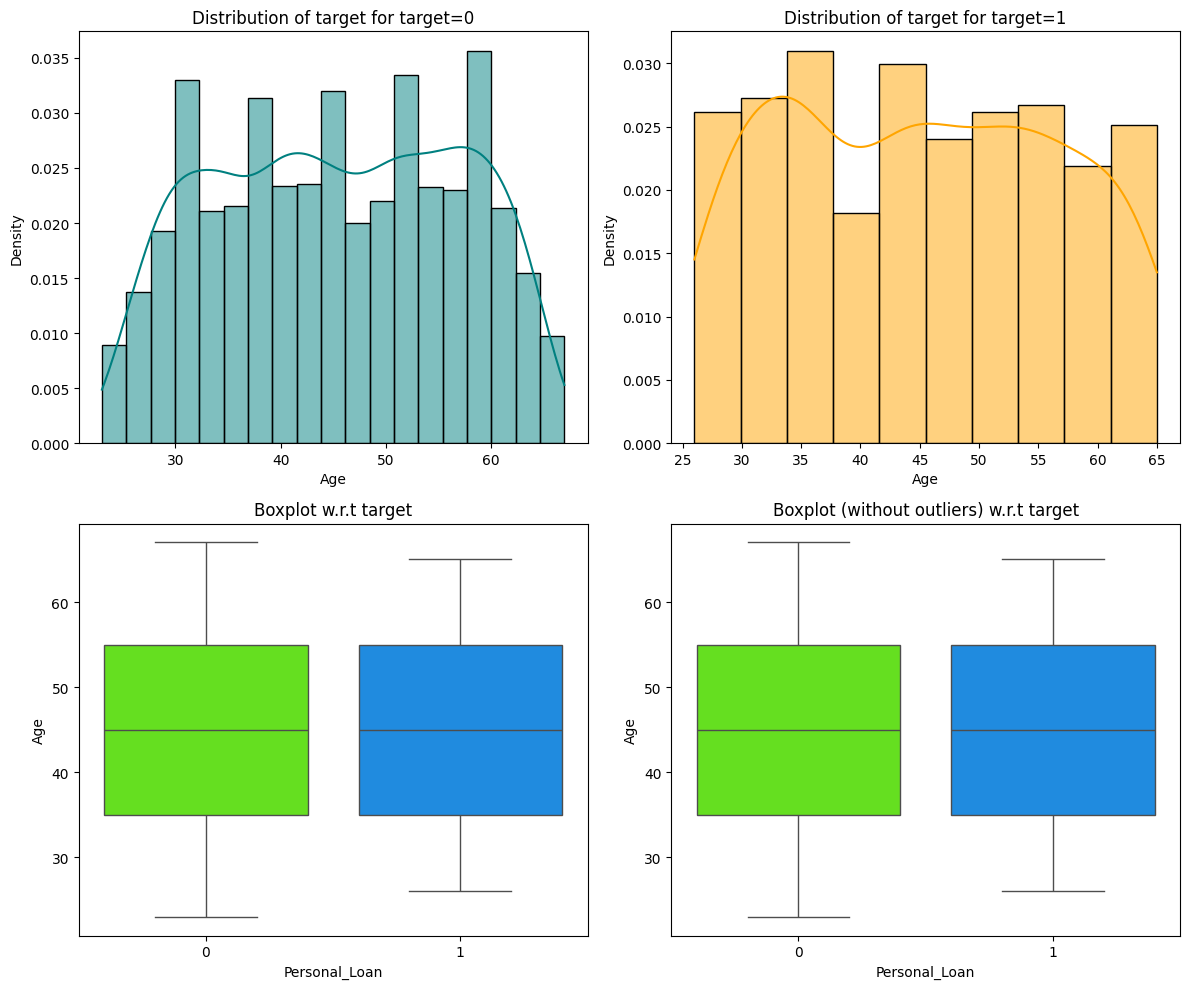

In [ ]:
# relationship between age and personal loan
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

###**Question 4: How does a customer's interest in purchasing a loan vary with their age?**

* It does not appear that age has a huge of an impact on whether or not they purchase a loan or not.
* The data looks fairly spread out, and the central tendency of both boxplots look identical.


#### Personal Loan vs Experience

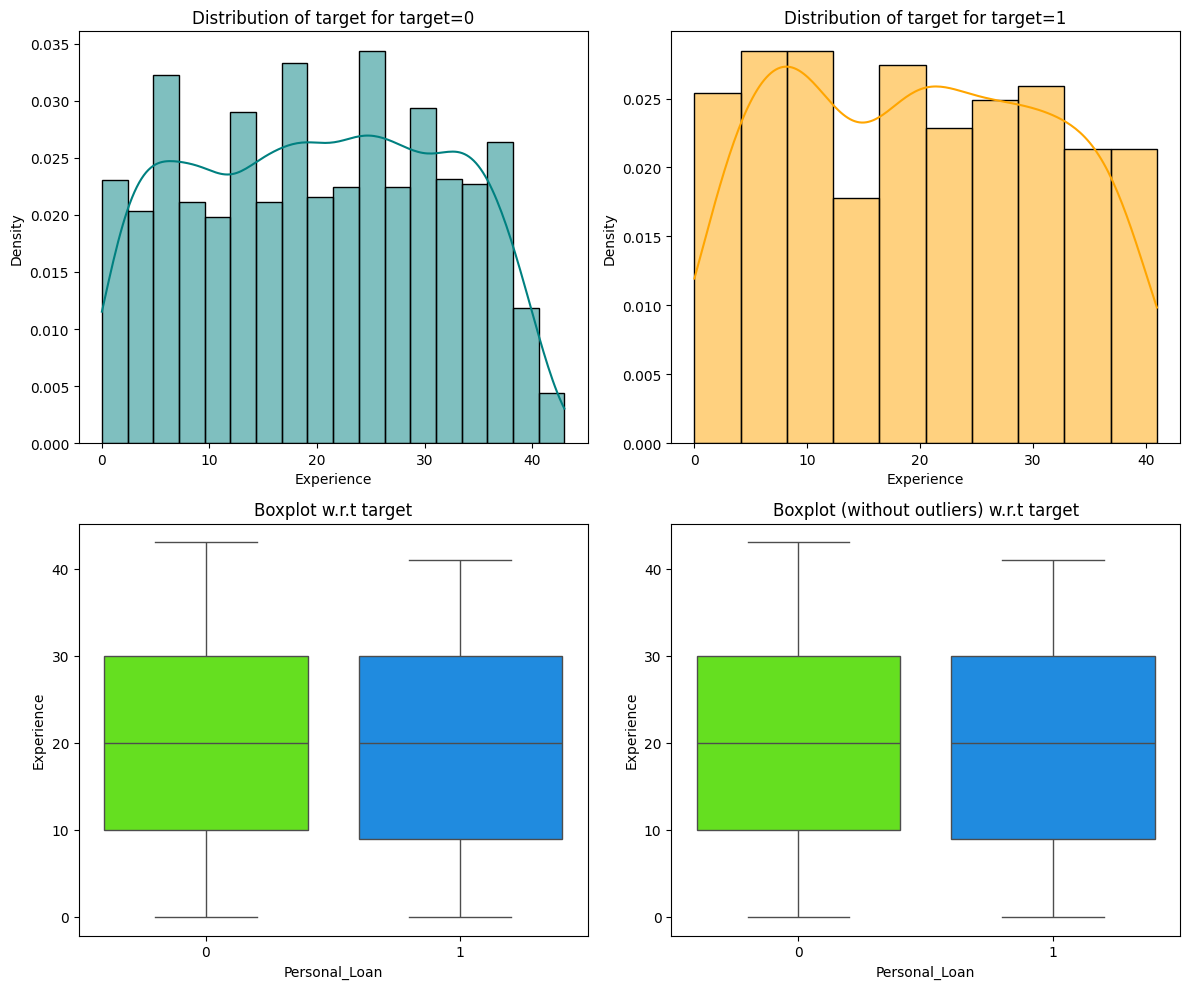

In [ ]:
# relationship between years of professional experiene and personal loan
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

* It does not appear that a customer's interest in purchasing a loan varies based on their years of experience working.

#### Personal Loan vs Income

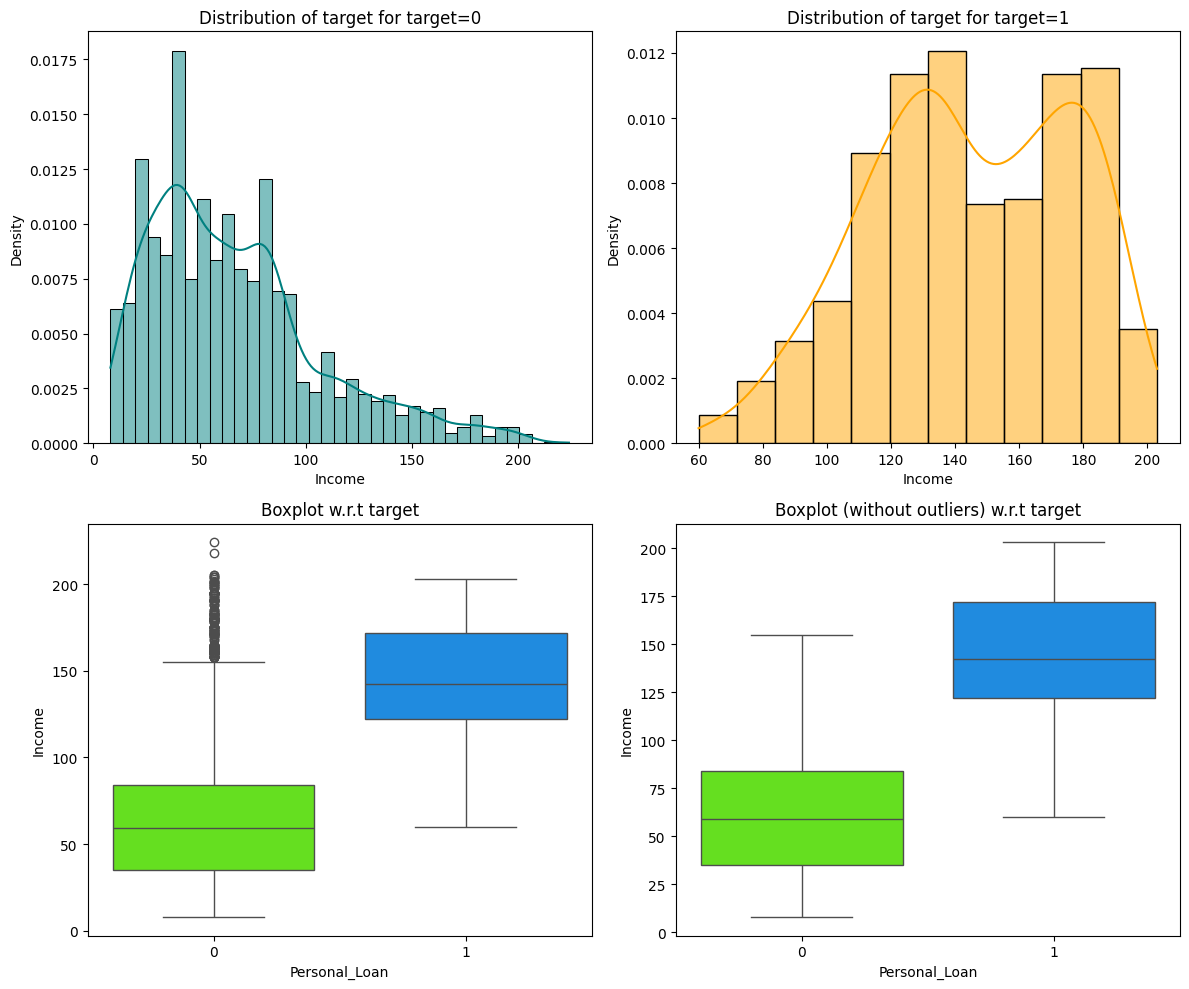

In [ ]:
# relationship between annual income of the customer and personal loan
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

#####**Observations:**
* We can say that customers are more likely to purchase a personal loan if their incomes are higher.

#####**Conclusions:**
* This makes sense, as customers with higher incomes may be more likely to accept a loan for reasons that may not apply as much to lower income individuals.

* Here are a few examples:
 * Greater financial stability - they are more confident they can repay the loan
 * Access better loan terms - stronger credit profiles may help them qualify for lower interst rates and higher loan amounts with lost cost
 * Lifestyle needs - may have larger financial goals that require additional funding (luxury purchases, investment opportunties, etc)
 * Potential tax benefits - some interest rates can be tax-deductible


#### Personal Loan vs CCAvg

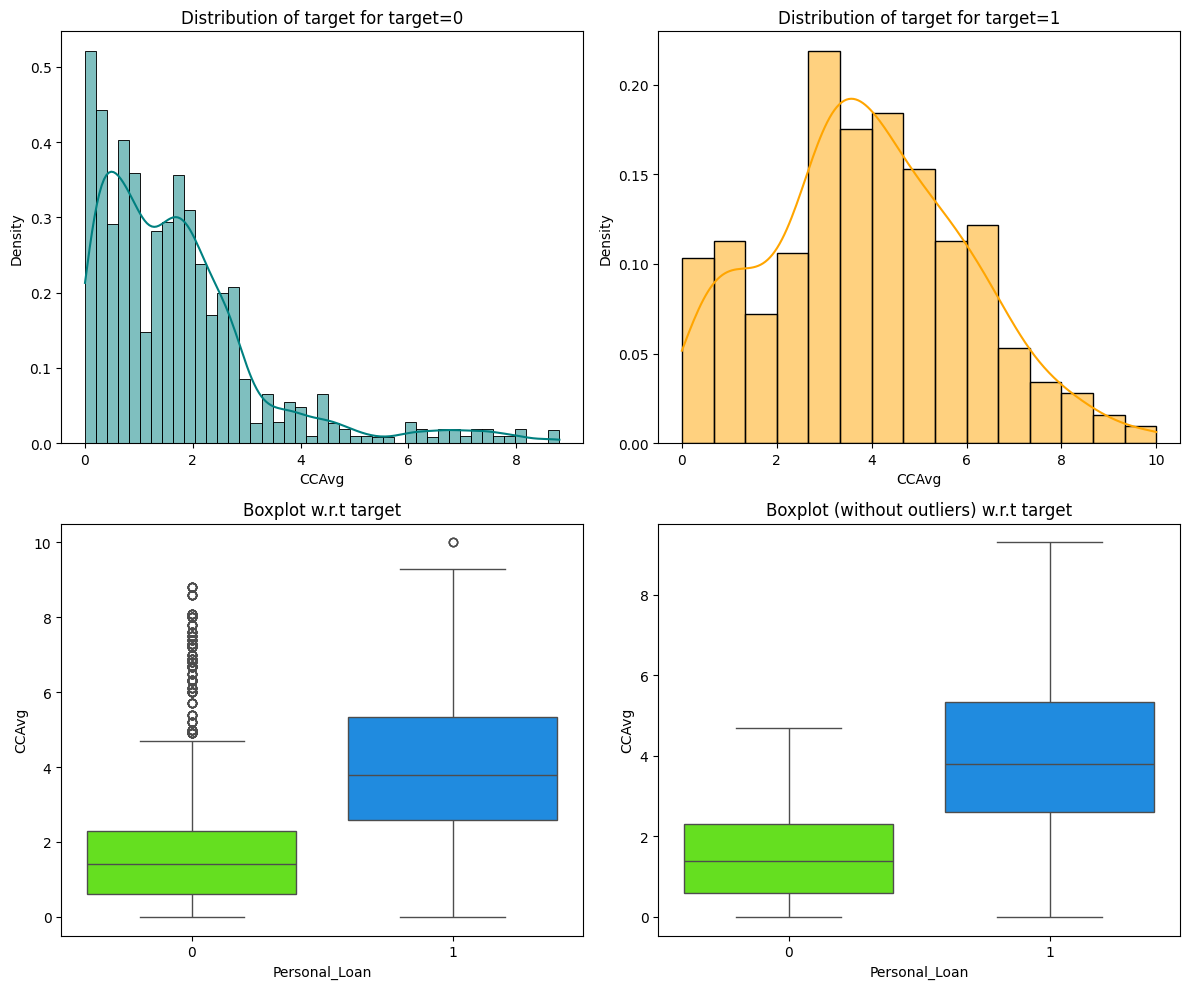

In [ ]:
# relationship between average credit card spending per month and personal loan
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

#####**Observations:**
* We can say that customers spend more on a credit card monthly on average are more likely to accept a personal loan than those who do not spend as much.

#####**Conclusions:**
* Several factors may explain why customers who spend more on their credit cards would accept a personal loan.
* Here are a few examples:
 * Comfortable with Debt - people who regularly use their credit cards for significant purchases are often more comfortable with debt and borrowing
 * Lifestyle and Spending Habits -  personal loans can provide a way to finance large purchases or pay for more expensive lifestyle habits without relying solely on credit cards or depleting savings
 * Need for Additional Funds - individuals with higher credit card spending may have ongoing financial needs or goals that exceed their available credit limits, which a personal loan could help cover

####Observations on Education vs Age:

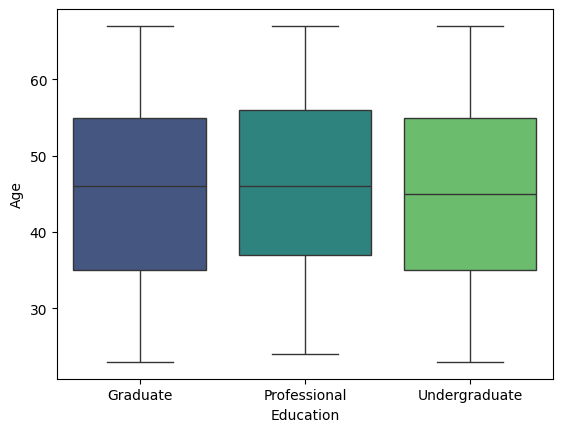

In [ ]:
#boxplot on level of education vs age
sns.boxplot(data=data, x='Education',y='Age',palette='viridis');

* Age does not seem to have a large impact on what level of education they have

#### Observations on Education vs Experience

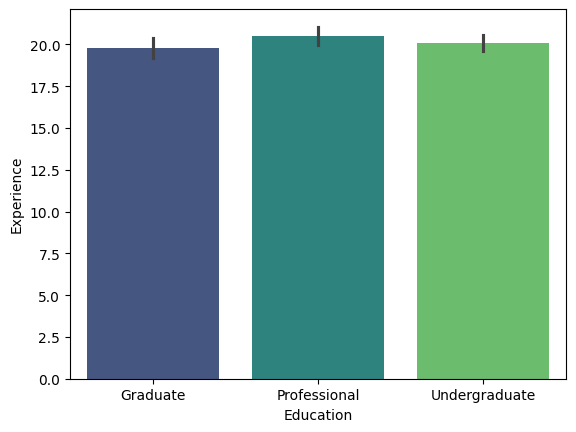

In [ ]:
#barplot on level of education vs years of work experience
sns.barplot(data=data, x='Education',y='Experience', palette='viridis');

* There does not seem to be a pattern between the education level and the number years of work experience between customers.

### Observations on Age vs Experience

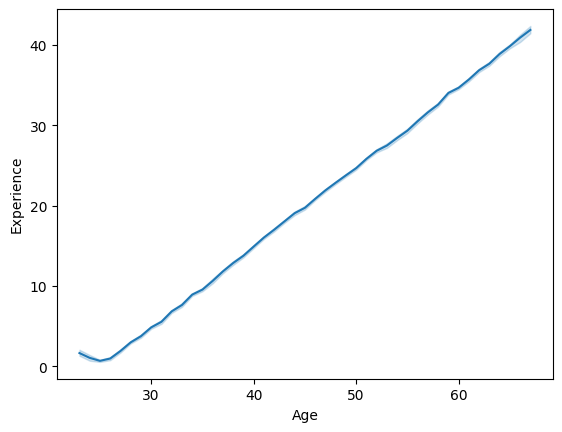

In [ ]:
# relationship between age and years experience
sns.lineplot(data=data,x='Age', y='Experience',palette='viridis');

* Age and Experience have a positive linear relationship.
* As people get older, they have more years of work experience.

#### Obeservations on Education vs Income

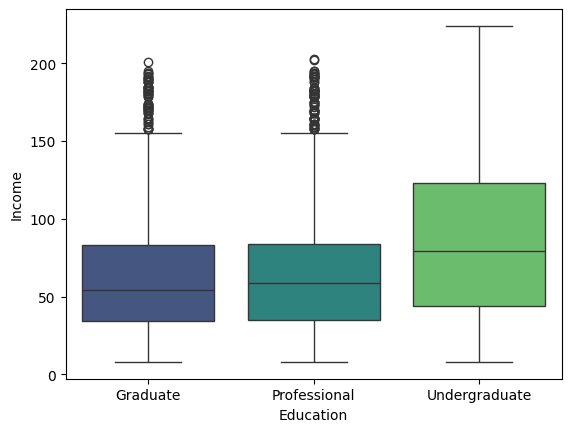

In [ ]:
#barplot on level of education vs annual income
sns.boxplot(data=data, x='Education',y='Income',palette='viridis');

* People with undergraduate degrees make more on average than the other two. Undergraduates also have the highest number of individuals in their category.
* There is more variability in the income of undergraduates, but there are a lot of outliers within the other two categories.

#### Observations on Education vs Income by Personal Loan

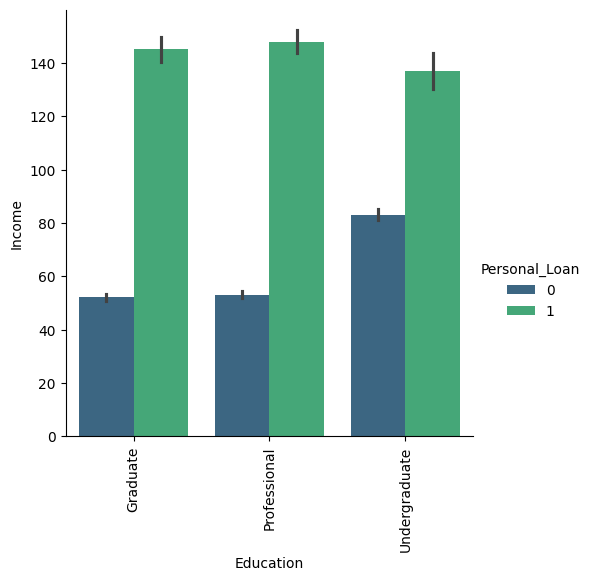

In [ ]:
# showing the relationship between the level of education and income, segmented by personal loan acceptance
sns.catplot(data=data, x='Education',y='Income', kind='bar', hue='Personal_Loan',palette='viridis')
plt.xticks(rotation=90)
plt.show()

* It seems that regardless of education level, poeple with higher incomes may be more likely to accept a loan, with professionals being most likely to accept.

#### Observations on Education vs CCAvg

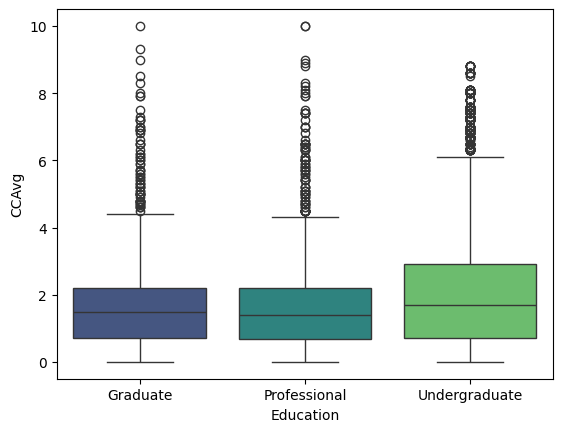

In [ ]:
#boxplot on level of education vs CCAvg
sns.boxplot(data=data, x='Education',y='CCAvg',palette='viridis');

* Graduates and Professional Education have similar spreads relative to Undergraduates - these two sets have less observations than undergraduates, so they are more prone to outliers.
* Professional education has the highest spending amount (outlier but still true).
* Undergraduates have the highest median spending.


#### Observations on Securities Accounts with Variables

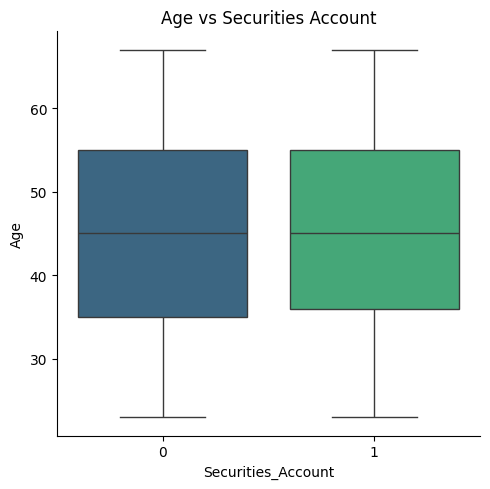

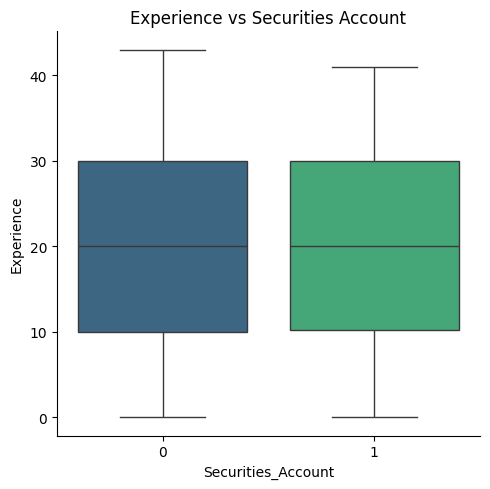

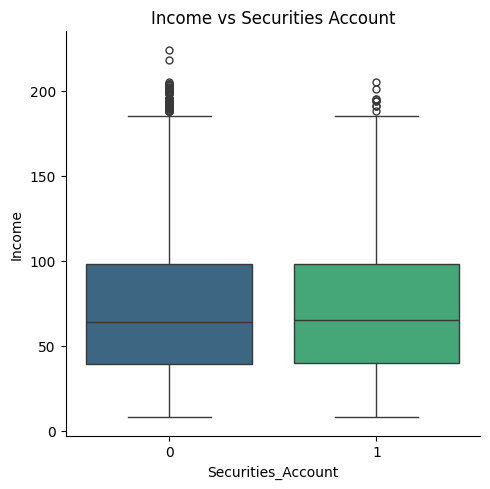

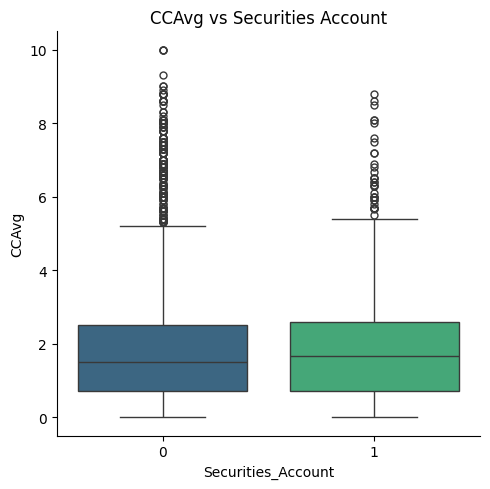

In [ ]:
# Define the numerical variables
numerical_vars = ['Age', 'Experience', 'Income', 'CCAvg']

# Creating seperate graphs for each numerical variable with securities accounts
for var in numerical_vars:
    sns.catplot(x='Securities_Account', y=var, data=data, kind='box', palette='viridis')
    plt.title(f'{var} vs Securities Account')
    # Adjust layout
    plt.tight_layout()
    plt.show()

* It appears that none of these variables have a significant impact on whether or not someone has a securities account or not as all of the boxplots have similar distributions.

#### Observations for CD Account vs Numerical Variables

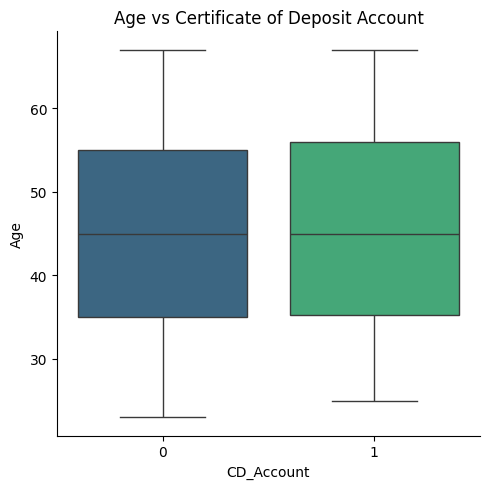

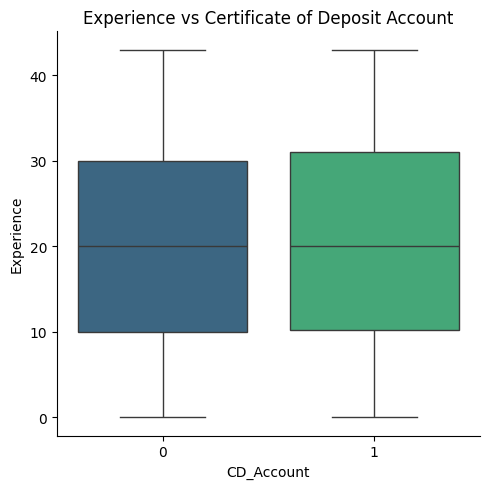

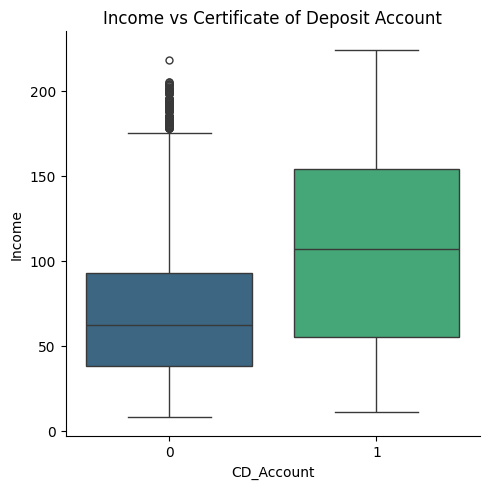

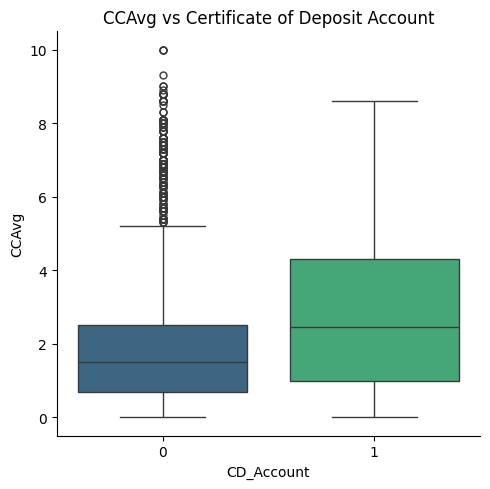

In [ ]:
# Define the numerical variables for comparison
numerical_vars = ['Age', 'Experience', 'Income', 'CCAvg']

# Creating seperate graphs for each numerical variable with CD accounts
for var in numerical_vars:
    sns.catplot(x='CD_Account', y=var, data=data, kind='box', palette='viridis')
    plt.title(f'{var} vs Certificate of Deposit Account')
    # Adjust layout
    plt.tight_layout()
    plt.show()

* Customers with CD's have higher incomes on average, as well as higher monthly spending on credit cards.
* Income and CCAvg appear to have some sort of impact on whether or not someone has a Certificate of Deposit account.

#### Observation of Online Banking vs Numerical Variables:

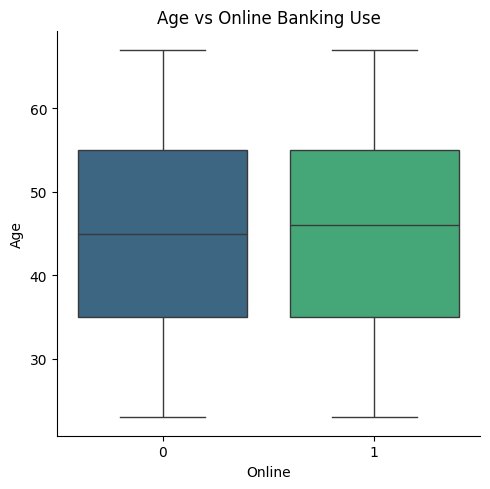

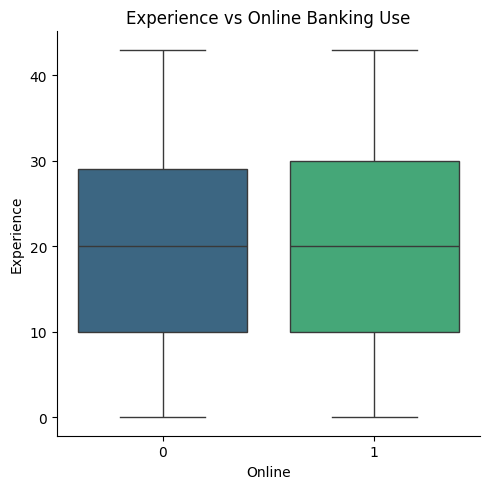

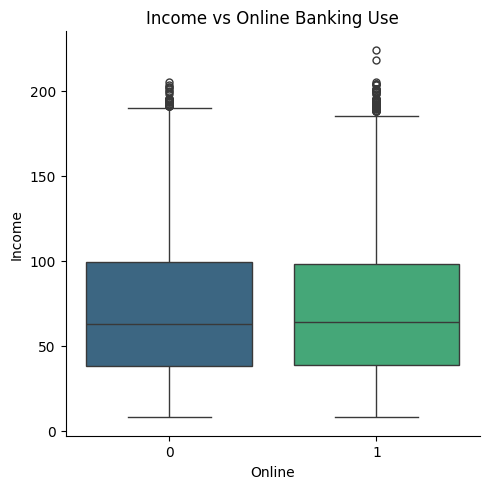

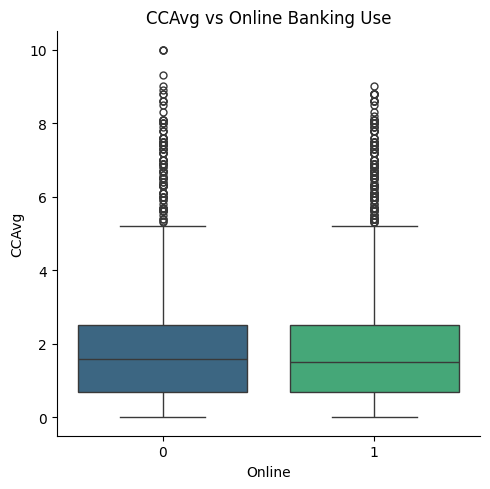

In [ ]:
# Define the numerical variables for comparison
numerical_vars = ['Age', 'Experience', 'Income', 'CCAvg']

# Creating seperate graphs for each numerical variable w online banking
for var in numerical_vars:
    sns.catplot(x='Online', y=var, data=data, kind='box', palette='viridis')
    plt.title(f'{var} vs Online Banking Use')
    # Adjust layout
    plt.tight_layout()
    plt.show()

* Whether a customer uses online banking or not does not seem to have an effect on these other variables.

#### Observations of Credit Cards vs Numerical Variables

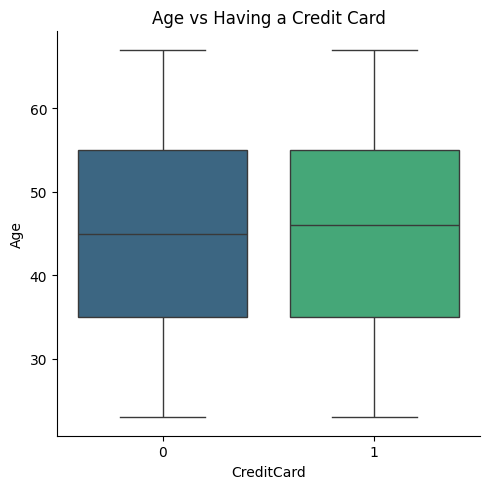

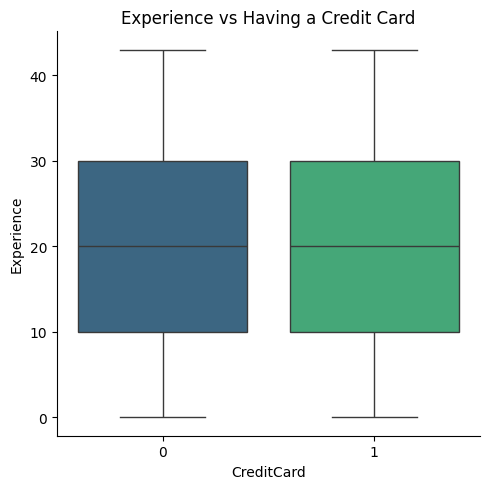

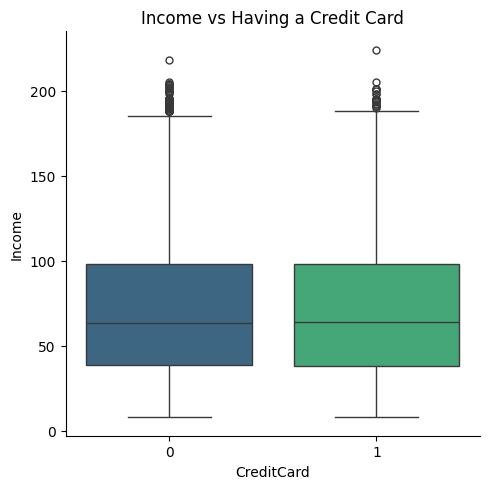

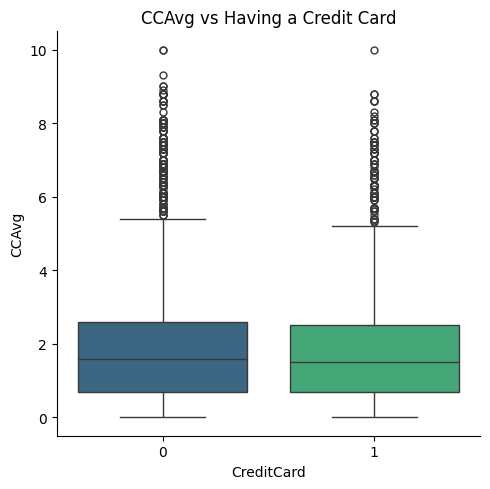

In [ ]:
# Define the relevant numerical variables for comparison
numerical_vars = ['Age', 'Experience', 'Income', 'CCAvg']

# Creating seperate graphs for each numerical variable with credit cards
for var in numerical_vars:
    sns.catplot(x='CreditCard', y=var, data=data, kind='box', palette='viridis')
    plt.title(f'{var} vs Having a Credit Card')
    # Adjust layout
    plt.tight_layout()
    plt.show()

* Age and Experience are both normally distributed.
* Whether or not they have a credit card from another bank does not appear to affect any of these variables one way or another.  

* Families with size 2 have the highest income.

#### Observations on Family Size vs Numerical Variables

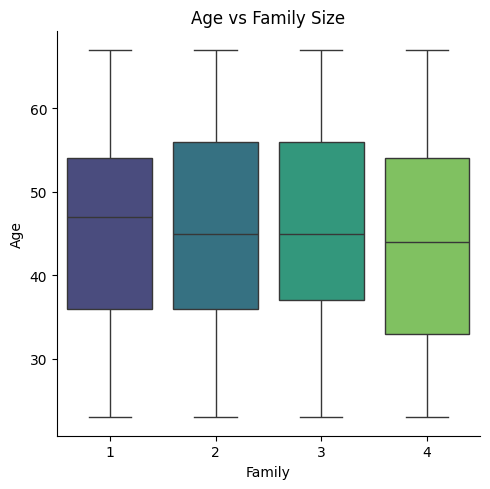

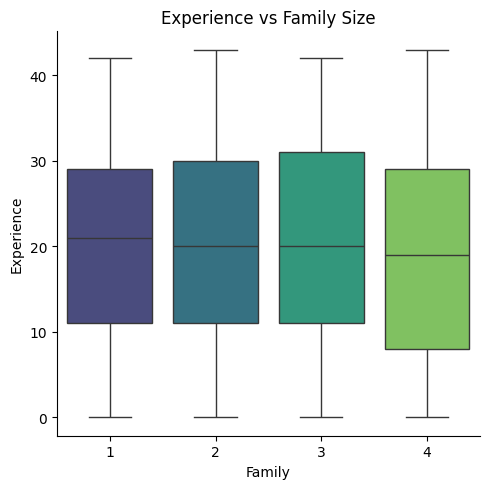

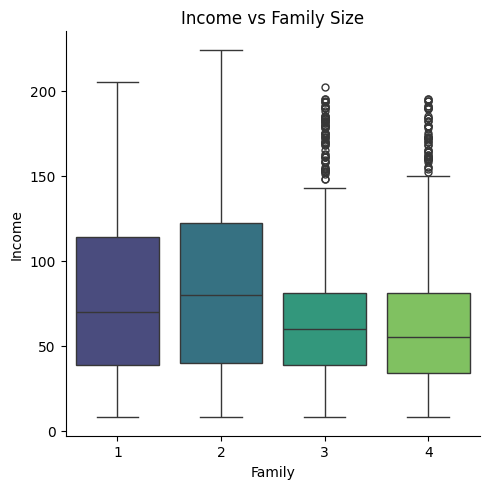

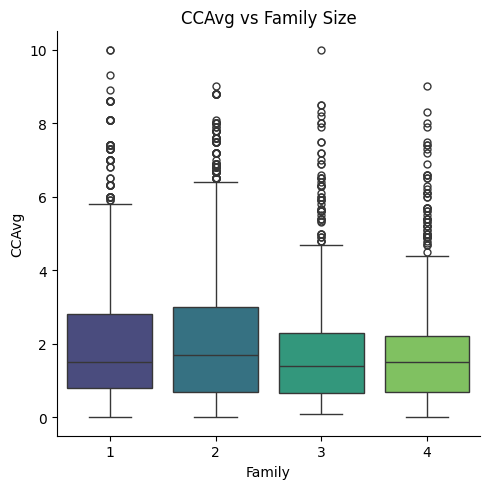

In [ ]:
# Define the numerical variables
numerical_vars = ['Age', 'Experience', 'Income', 'CCAvg']

# Creating seperate graphs for each numerical variable with family size
for var in numerical_vars:
    sns.catplot(x='Family', y=var, data=data, kind='box', palette='viridis')
    plt.title(f'{var} vs Family Size')
    # Adjust layout
    plt.tight_layout()
    plt.show()

* There are a lot of outliers with CCAvg. The median for credit card spending is highest in families of 2, but the maxmimum spending falls in the family size of 3 category.
* Those with family size two have a higher median income than other family sizes. The highest income also falls in the family of 2 category.

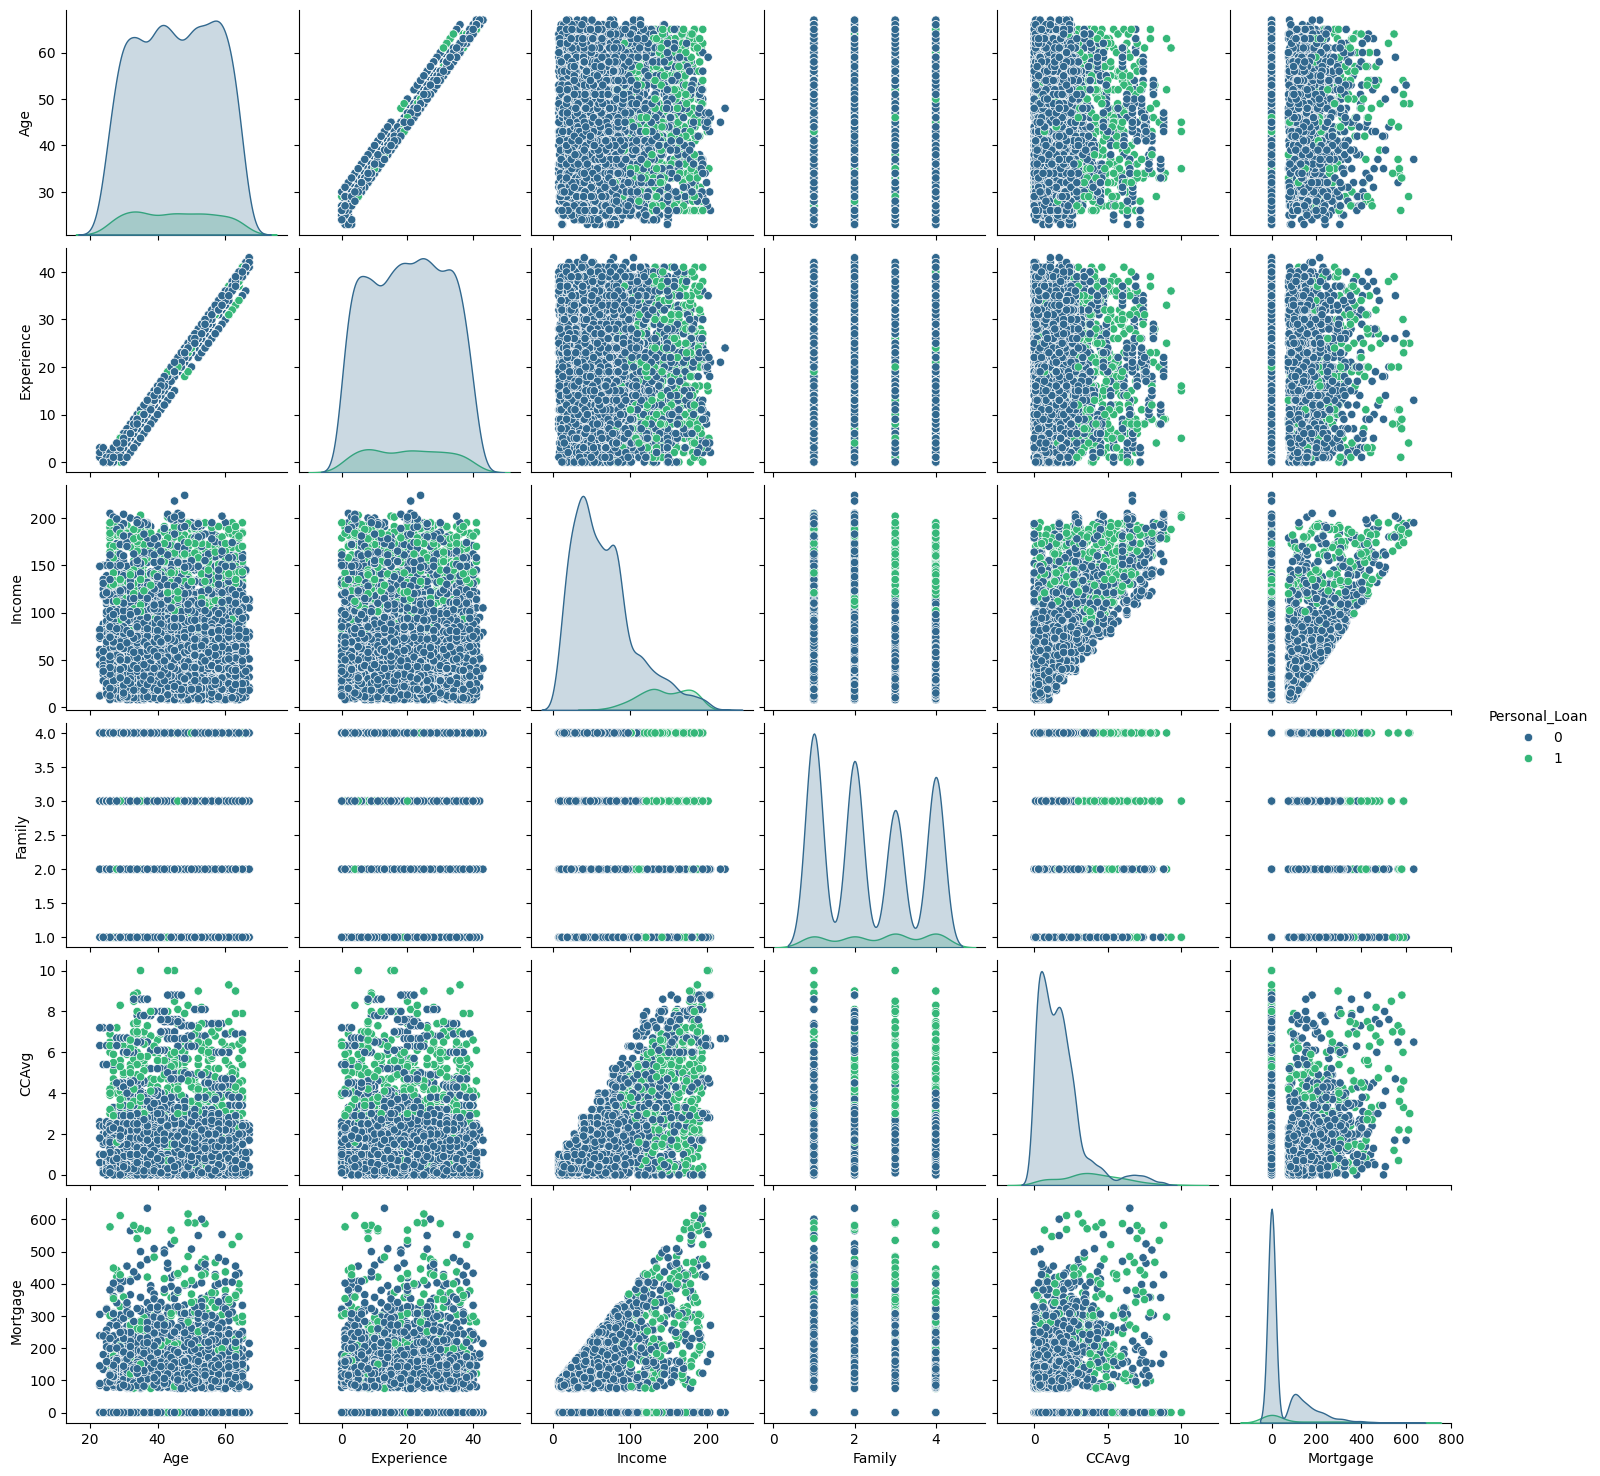

In [ ]:
# pairplot of numerical values with whether they took personal loans
sns.pairplot(data,hue="Personal_Loan",palette='viridis');

* We can see the correlation between income and CCAvg, age and experience, and income and mortgage.
* Age and years of experience appear to have the highest correlation, which makes sense given that the longer older you are, the longer you will have worked.

* As income increases, mortgage amount increases or stays the same - this could be due to staying in the same house/having the same mortgage but salary increasing. Some people have no mortgage.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

#### Outlier Detection

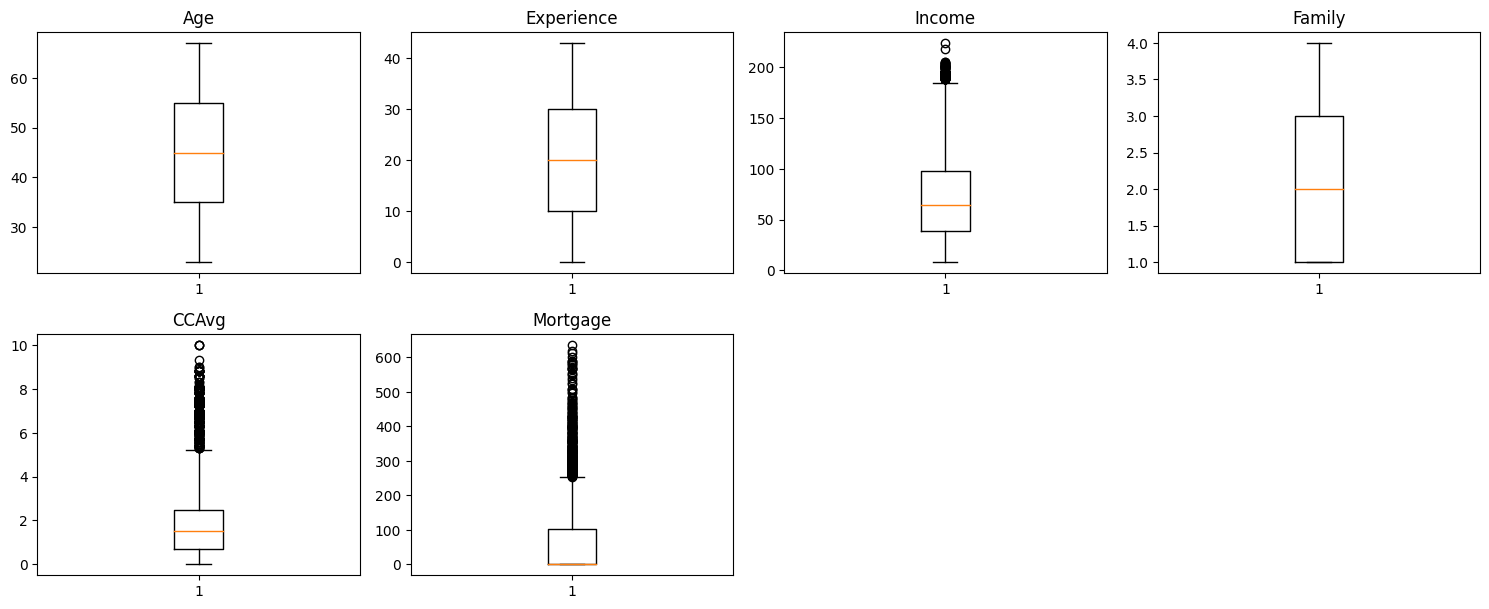

In [ ]:
#outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,12))

for i, variable in enumerate(numeric_columns):
  plt.subplot(4,4, i + 1)
  plt.boxplot(data[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)

plt.show()

In [ ]:
# finding the outliers
Q1 = data.quantile(0.25)  # Finding the 25th percentile.
Q3 = data.quantile(0.75)  # Finding the 75th percentile.
IQR = Q3 - Q1             # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR    # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [ ]:
# percentage of outliers for each numerical column in the DataFrame
((data.select_dtypes(include=["float64", "int64"]) < lower) #indicates whether each value in the original DataFrame is an outlier
    |(data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100 #percentage of outliers for each column

Age          0.00000
Experience   0.00000
Income       1.92000
Family       0.00000
CCAvg        6.48000
Mortgage     5.82000
dtype: float64



*   There are no outliers in the Age, Experience, or Family data, while there are outliers in the Income, CCAvg, and Mortgage data - all of these outliers are above Q3.
*   6.48% of CCAvg's are outliers, suggesting there are people who spend a lot more monthly.
* 5.82% of Mortgage payments are outliers, suggesting there are peope who are paying significantly more on mortgage payments per month.
* 1.92% of annual incomes are outliers, suggesting there are customers who make significatly more annually.

* We will not treat the outliers as they are proper values.

### Data Preparation for Model Building


* We want to predict whether a liability customer will buy personal loans.

* We will build a model using the train data and then check it's performance on the test data.




In [ ]:
# Separating the independent and dependent variable
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

In [ ]:
# Using one-hot encoding (get_dummies) on categorical variables 'ZIPCode' and 'Education' to convert them to a numerical format
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)
X.head()

Age  Income  Family   CCAvg  Mortgage Securities_Account CD_Account Online  \
0   25      49       4 1.60000         0                  1          0      0   
1   45      34       3 1.50000         0                  1          0      0   
2   39      11       1 1.00000         0                  0          0      0   
3   35     100       1 2.70000         0                  0          0      0   
4   35      45       4 1.00000         0                  0          0      0   

  CreditCard  ZIPCode_91  ZIPCode_92  ZIPCode_93  ZIPCode_94  ZIPCode_95  \
0          0           1           0           0           0           0   
1          0           0           0           0           0           0   
2          0           0           0           0           1           0   
3          0           0           0           0           1           0   
4          1           1           0           0           0           0   

   ZIPCode_96  Education_Professional  Education_Undergraduate  
0           0                       0                        1  
1           0                       0                        1  
2           0                       0                        1  
3           0                       0                        0  
4           0                       0                        0

### EDA after Manipulation

Income vs Family Size:

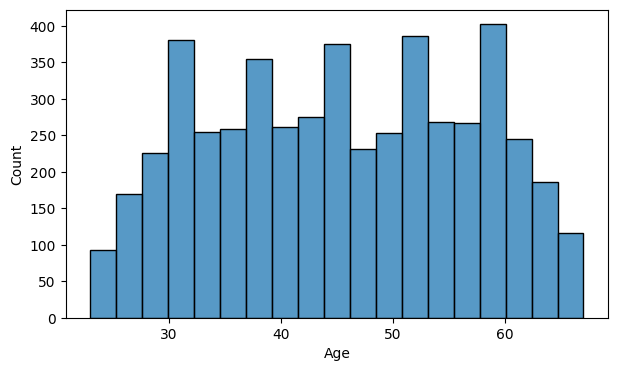

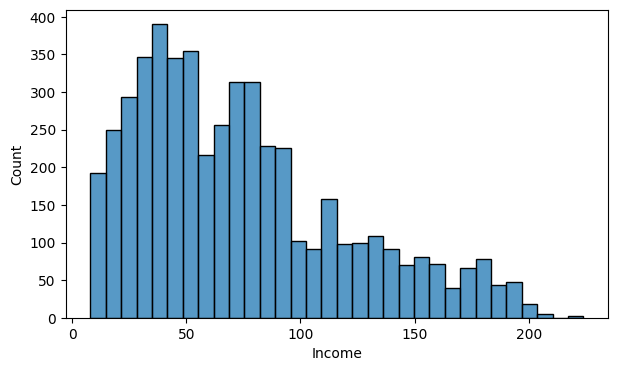

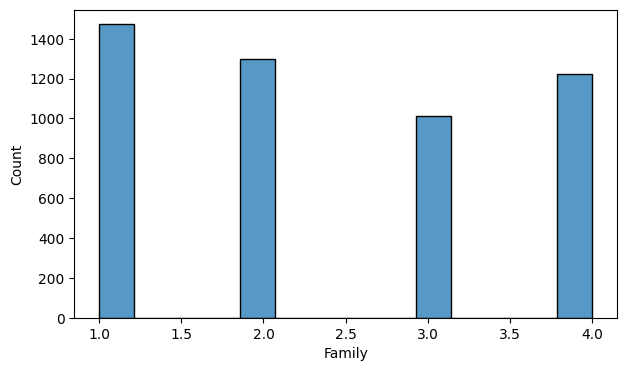

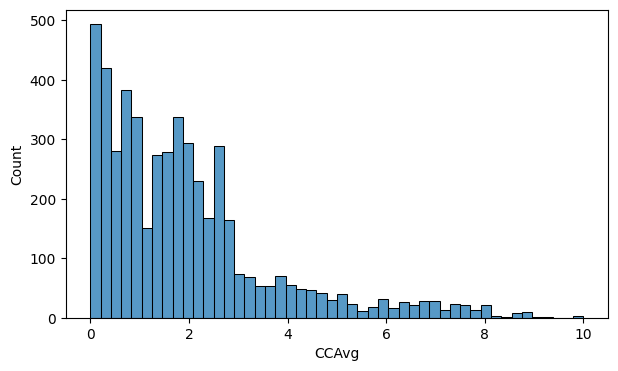

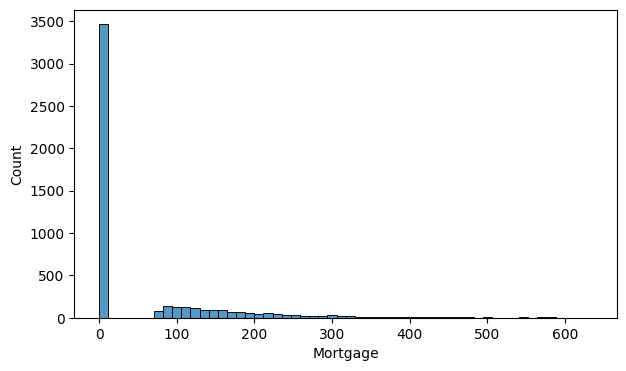

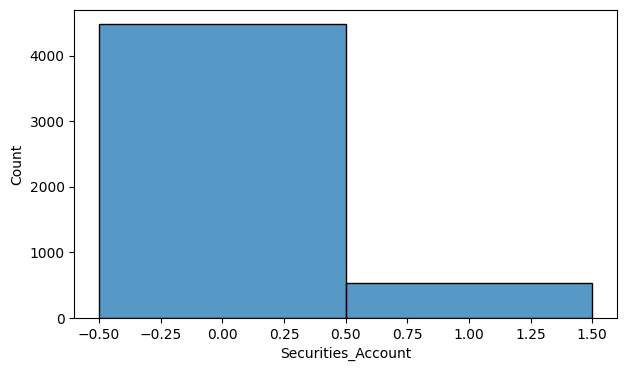

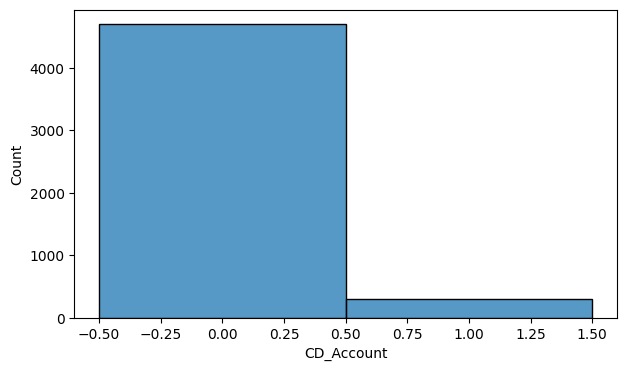

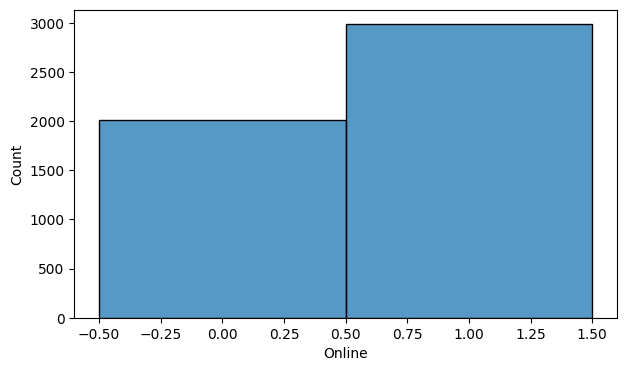

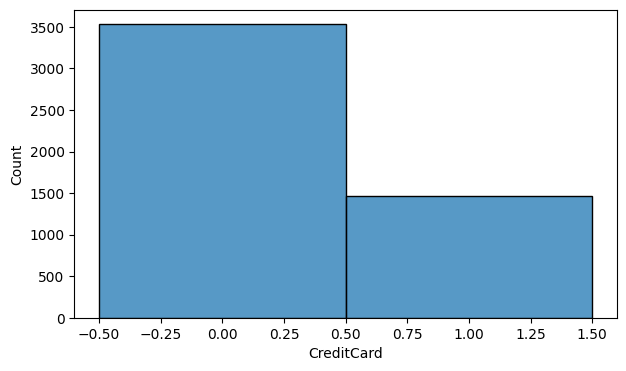

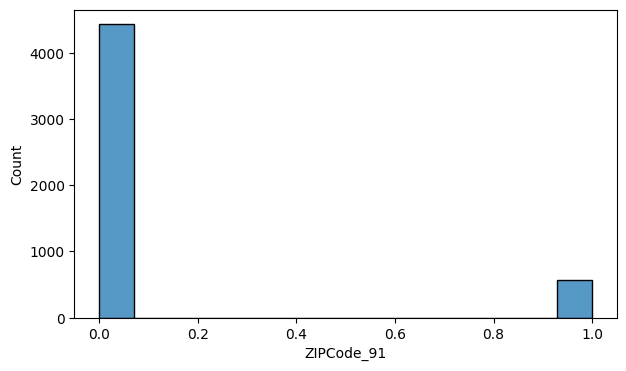

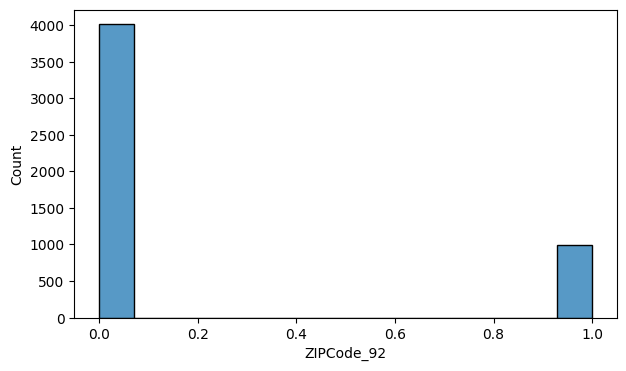

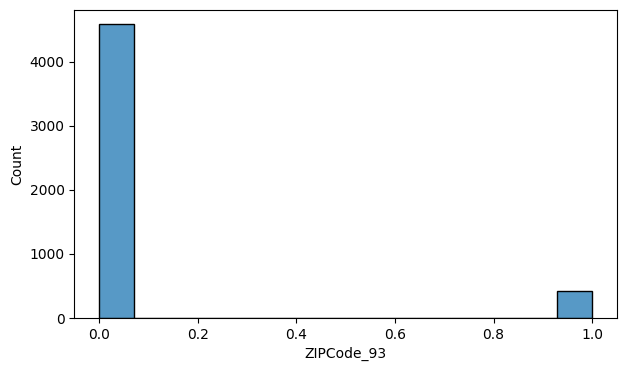

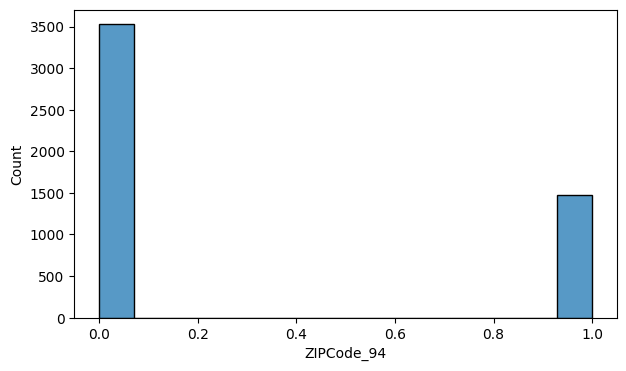

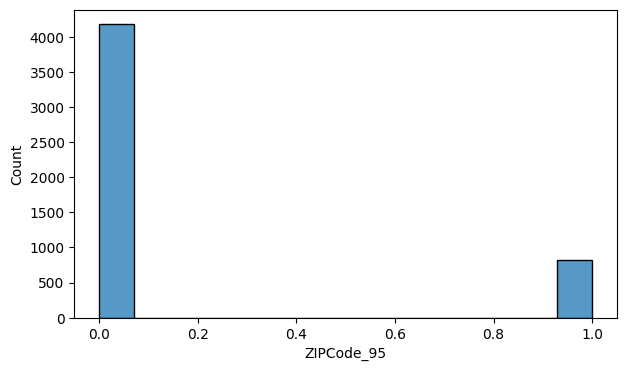

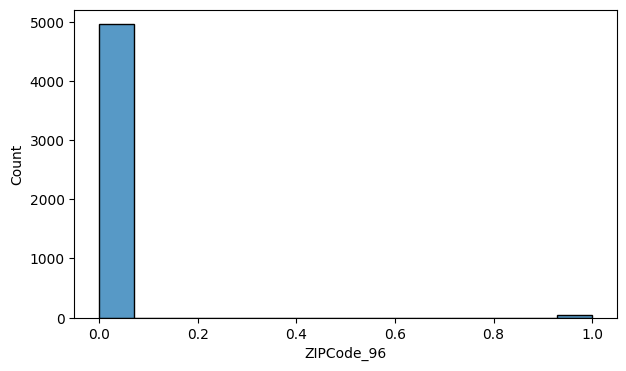

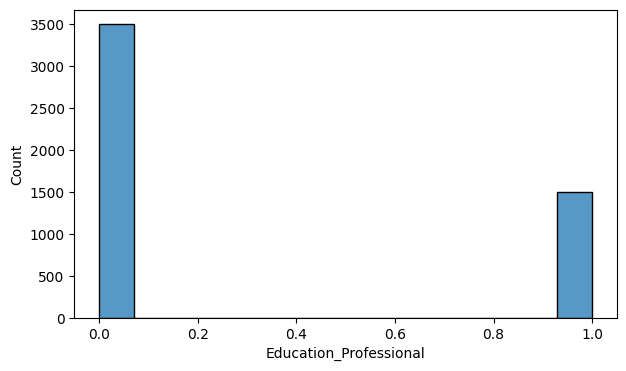

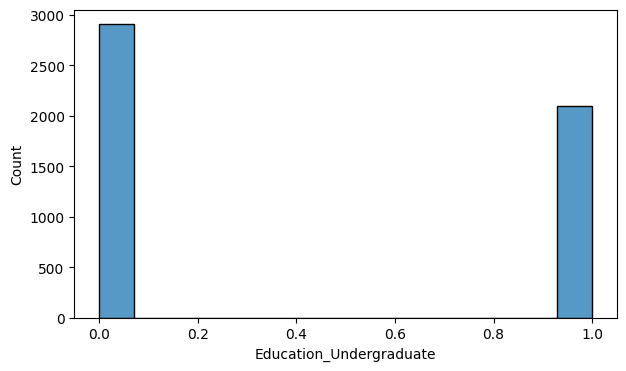

In [ ]:
# exploring data after manipulation
for i in X.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(data=X, x=i)
    plt.show()

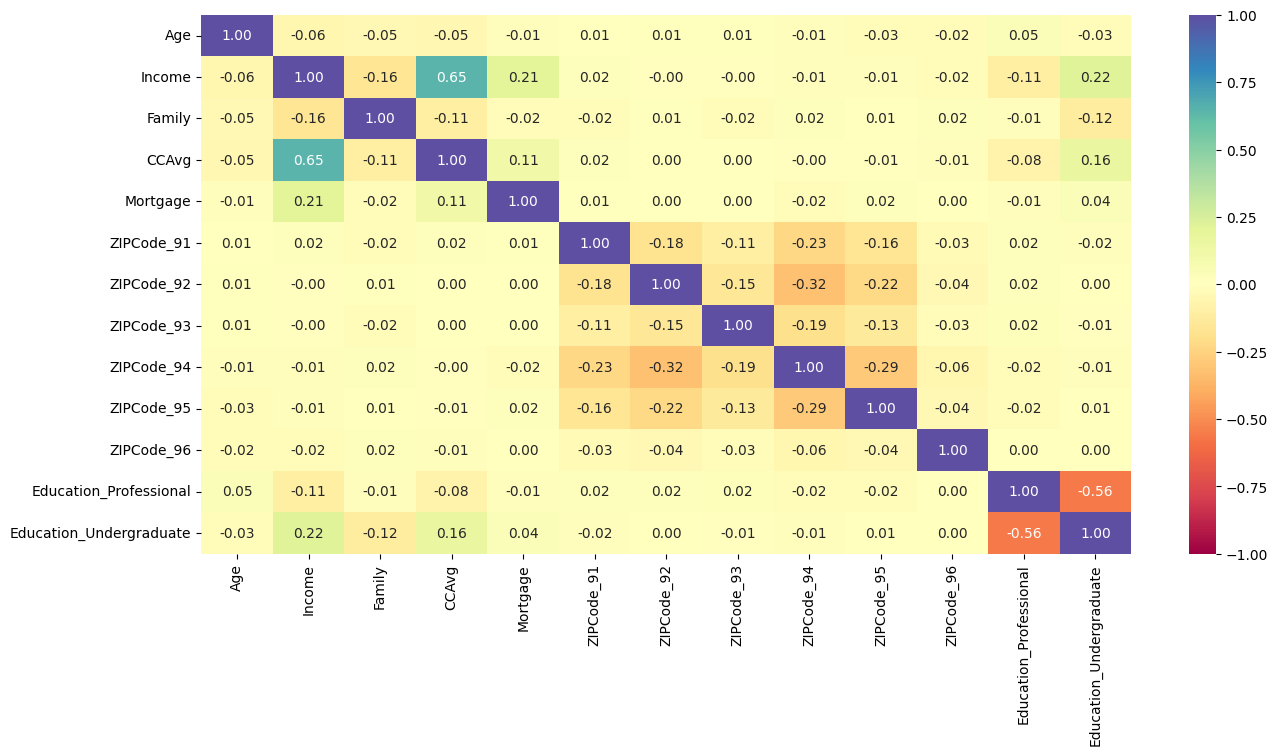

In [ ]:
#correlation heatmap
plt.figure(figsize=(15,7))
sns.heatmap(
    X.corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

* There is a slight negative correlation betwen professional eduation and undergraduate education.
* There is a slight positive correlation between CCAvg and Income.

### Data Preprocessing

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
# Printing the shapes of the training and test sets to verify the split
print("Shape of Training set : ", X_train.shape)     # getting the shape of train data
print("Shape of test set : ", X_test.shape)          # getting the shape of test data

# Printing the percentage of each class in the training and test sets
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))           # value counts of y train data
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))        # value counts of y test data

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
0   0.90543
1   0.09457
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0   0.90067
1   0.09933
Name: Personal_Loan, dtype: float64


* The training set has 3500 rows and 17 columns, while the test set has 1500 rows and 17 columns.
* In the training set, about 90.5% of the samples belong to class 0 (no personal loan) and about 9.5% belong to class 1 (accepted personal loan).
* In the test set, about 90.1% of the samples belong to class 0 (no loan) and about 9.9% belong to class 1 (accepted loan).

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**

* Predicting a customer will take the personal loan but the customer will not actually take the personal loan, resulting in a loss of resources.
*  Predicting a customer will not take the personal loan but they actually were going to going to take the personal loan, resulting in a loss of opportunity.

**Which case is more important?**
* If we predict that a customer will not take a personal loan, but they actually would have taken the personal loan.
* This will have a bigger impact because they have missed out the opportunity to offer them a loan in the first place when they would have accepted. Therefore, the bank misses out on potential revenue and growth opportunities.

**How to reduce this loss i.e need to reduce False Negatives?**

* The bank would want to focus on increasing our ***Recall*** for this model. A high Recall means our model is good at finding most of these customers who are actually interested in taking a loan. We want to maximize recall because we don't want to miss out on potential customers who could bring in business for the bank, i.e. we want to reduce the number of False Negatives.

**These are the functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot confusion matrix.


### Model Building

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# creating the confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Build Decision Tree Model

In [ ]:
# Using Decision Tree Classifier
model0 = DecisionTreeClassifier(criterion="gini", random_state=1)
model0.fit(X_train, y_train)  # fitting decision tree on train data

DecisionTreeClassifier(random_state=1)

#### Checking Model Performance on Training Data

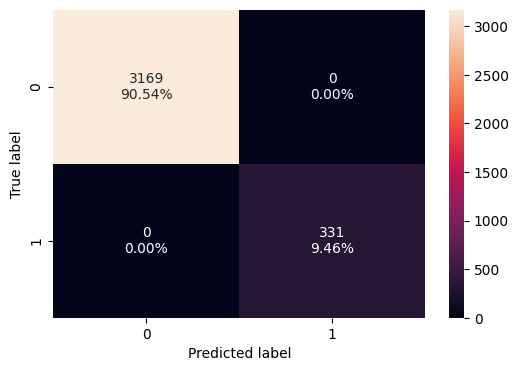

In [ ]:
# confusion matrix for train data
confusion_matrix_sklearn(model0, X_train, y_train)

In [ ]:
# model performance on train data for decision tree sklearn
decision_tree_perf_train = model_performance_classification_sklearn(model0, X_train, y_train)
decision_tree_perf_train

Accuracy  Recall  Precision      F1
0   1.00000 1.00000    1.00000 1.00000

* The errors are 0, which means it's a perfect model. This is likely too good to be true, therefore this model has a lot of overfitting.

**Checking Model Performance on Test Data for Decision Tree sklearn**

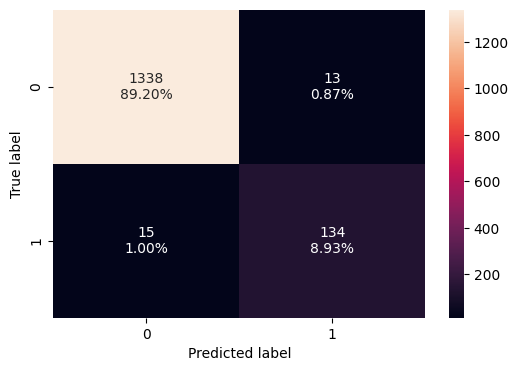

In [ ]:
# confusion matrix for test data
confusion_matrix_sklearn(model0,X_test, y_test)

In [ ]:
# model performance on test data for decision tree sklearn
decision_tree_perf_test = model_performance_classification_sklearn(model0,X_test,y_test)
decision_tree_perf_test

Accuracy  Recall  Precision      F1
0   0.98133 0.89933    0.91156 0.90541

Observations:

* The model built using the decision tree algorithm achieved perfect performance on the training data, with an accuracy, recall, precision, and F1 score of 1.00.

* However, when evaluated on the test data, the model's performance slightly decreased. It achieved an accuracy of 0.98, indicating that it correctly classified 98% of the samples. The recall, precision, and F1 score were also lower, indicating that while the model performed well, it did not generalize perfectly to unseen data.

* In conclusion, the decision tree model performed exceptionally well on the training data but showed a decrease in performance when evaluated on the test data, suggesting a degree of overfitting.

**Visualizing the Decision Tree**

In [ ]:
# retrieving column names from X_train
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_Professional', 'Education_Undergraduate']


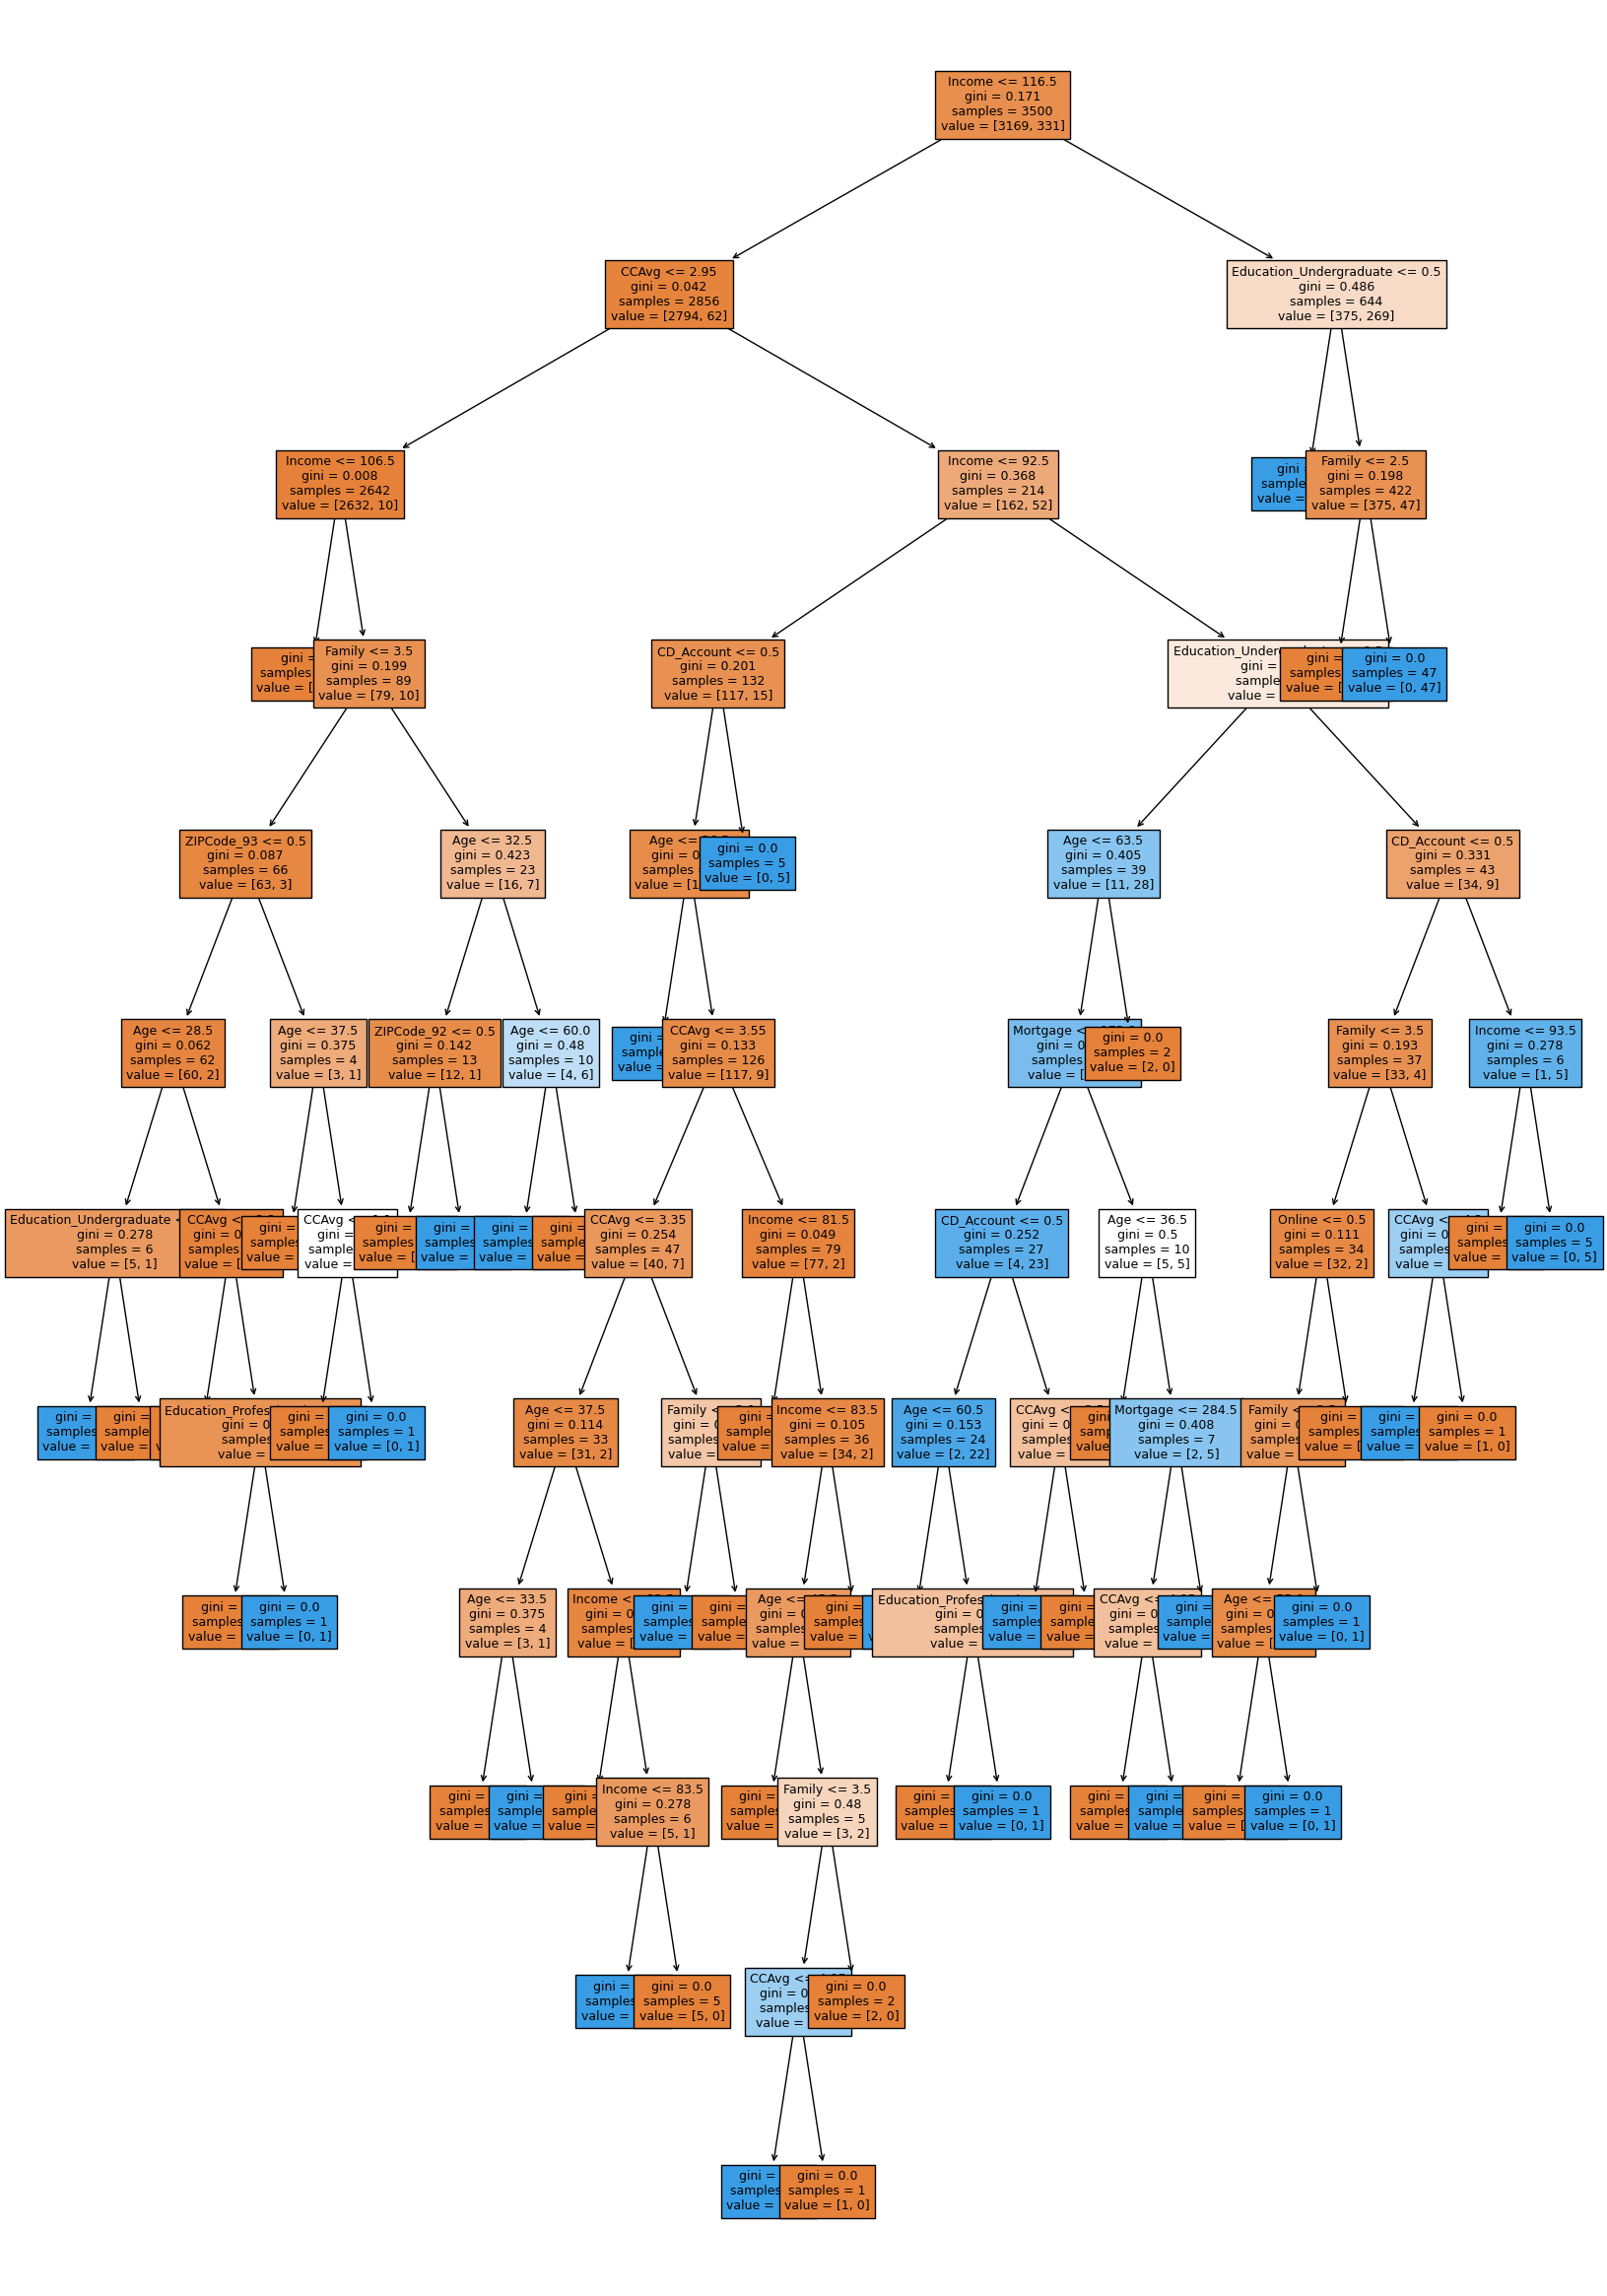

In [ ]:
# Plotting the decision tree trained using the 'DecisionTreeClassifier'
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model0,#trained decision tree model
    feature_names=feature_names,#list of feature names used
    filled=True, #if true, nodes are colored to indicate majority class, default is false
    fontsize=9,
    node_ids=False, #if true, will show ID number on each node, default is false
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree

print(tree.export_text(model0, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93

#### **Decision Tree Rules**

Rule 1) Income <= $116.50:

* If a customer spends less on credit cards and has a moderate income, factors like age and education level influence the prediction.
* If a customer spends more on credit cards, their income and education level primarily determine the prediction.

Rule 2) Income > $116.50:
* If a customer is not an undergraduate, they're more likely to accept a personal loan.
* If a customer is an undergraduate, their family size becomes a key factor in the prediction.

In [ ]:
# Importance of features in the tree building
# Importance score will show how much it contributes to reducing impurity in the decision tree nodes during the training process

print(pd.DataFrame(model0.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False))

                            Imp
Education_Undergraduate 0.40373
Income                  0.30476
Family                  0.16172
CCAvg                   0.05311
Age                     0.03604
CD_Account              0.02571
Mortgage                0.00556
Education_Professional  0.00514
ZIPCode_92              0.00308
ZIPCode_93              0.00059
Online                  0.00056
Securities_Account      0.00000
ZIPCode_91              0.00000
ZIPCode_94              0.00000
ZIPCode_95              0.00000
ZIPCode_96              0.00000
CreditCard              0.00000


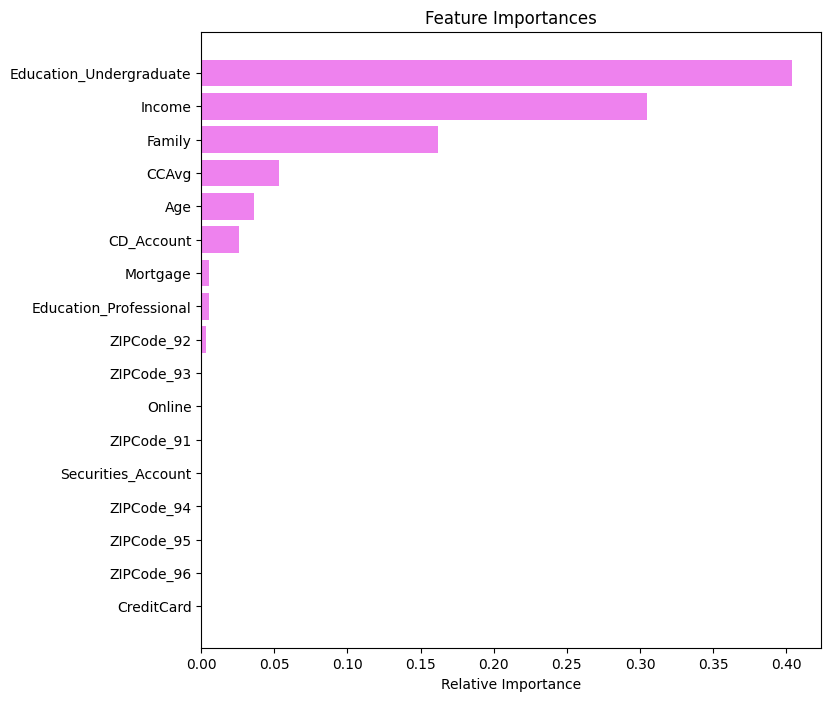

In [ ]:
# graph to show feature importances
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Undergraduate Education and income are the most important.

###Model Performance Improvement

###**Pre-Pruning**

In [ ]:
# chosing the type of classifier
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# fit the best algorithm to the data
estimator.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=1)

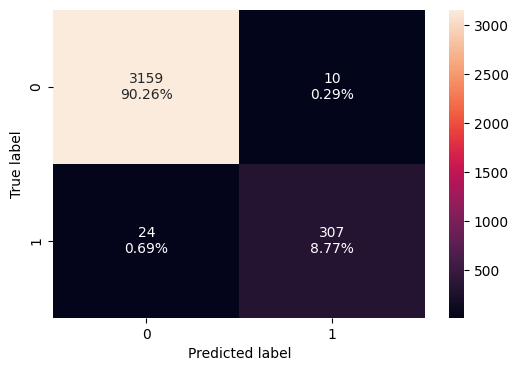

In [ ]:
# confusion matrix for train data during pre-pruing
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
# checking performance on train data during pre-pruing
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator,X_train,y_train)
decision_tree_tune_perf_train

Accuracy  Recall  Precision      F1
0   0.99029 0.92749    0.96845 0.94753

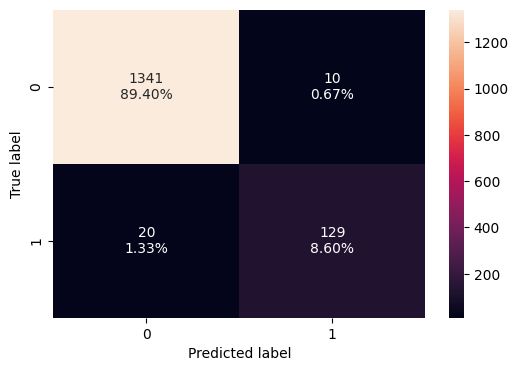

In [ ]:
# confusion matrix for test data during pre-pruing
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
# checking model performance on test data during pre-pruing
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator,X_test,y_test)
decision_tree_tune_perf_test

Accuracy  Recall  Precision      F1
0   0.98000 0.86577    0.92806 0.89583

####**Observations:**
* This pre-pruned decision tree model did pretty well on both training and testing data.

* On the training data, the accuracy was .99, meaning it got 99% right. It was particularly good at spotting the true positives (when it correctly predicted someone would accept a loan), with a rate of 93%. Its precision was also high, at 97%, which means it didn't often wrongly predict someone would take a loan when they wouldn't. Overall, it did great at both catching the right answers and avoiding incorrect answers.

* On the testing data, got about 98% of the answers right. Though this model's  recall was not as good at 87% (finding all the positive cases correctly 87% of the time), it still did well overall, with precision at 93% and an F1 score of 90%.

####**Conclusions:**
* Overall, the decision tree model, after tuning, demonstrated solid performance on both the training and test datasets, indicating its effectiveness in accurately predicting whether customers will accept personal loans.

**Visualizing the Decision Tree - Pre-Pruning**

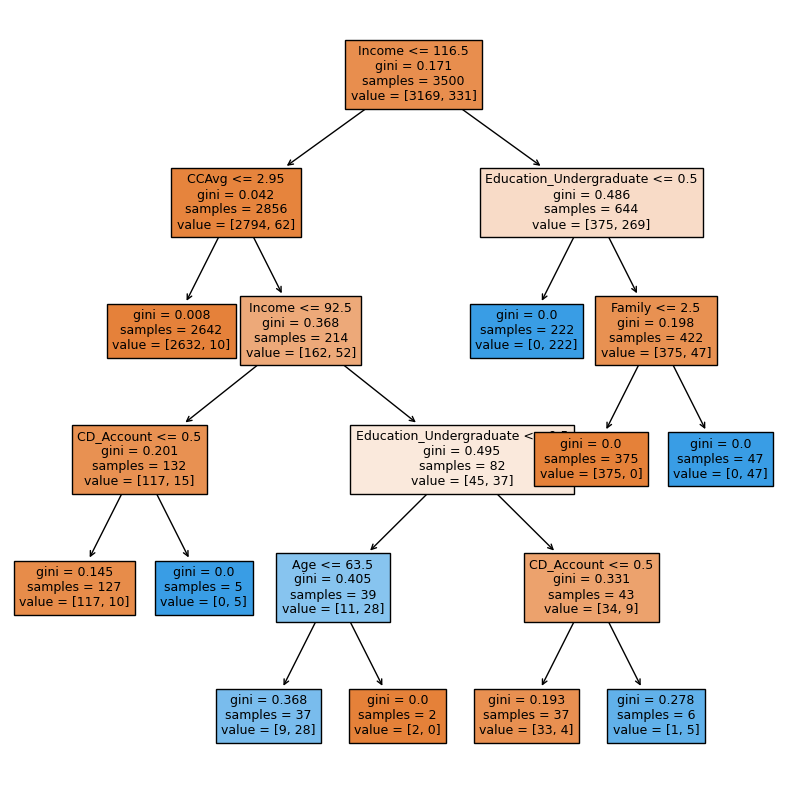

In [ ]:
# creating visual for the decision tree
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of the decision tree (rules to decide whether a customer will take a personal loan)

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |--- Age <= 63.50
|   |   |   |   |   |--- weights: [9.00, 28.00] class: 1
|   |   |   |   |--- Age >  63.50
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|--- Income >  116.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [0.00, 222.00] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.

#### **Decision Tree Rules**

Rule 1)  For customers with income less than or equal to 116.50:

 * If they spend less than or equal to 2.95 on credit cards, predict no loan.
 * If they spend more, decision depends on income, education, age, and CD account status.

Rule 2) For customers with income greater than 116.50:

 * If they're not undergraduates, predict a loan.
 * If they are, decision depends on family size.

In [ ]:
# importance of features in the tree building (Gini Importance) during pre-pruing
print(pd.DataFrame(estimator.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False))

                            Imp
Education_Undergraduate 0.44619
Income                  0.32739
Family                  0.15508
CCAvg                   0.04206
CD_Account              0.02524
Age                     0.00403
Securities_Account      0.00000
Online                  0.00000
Mortgage                0.00000
ZIPCode_91              0.00000
ZIPCode_92              0.00000
ZIPCode_93              0.00000
ZIPCode_94              0.00000
ZIPCode_95              0.00000
ZIPCode_96              0.00000
Education_Professional  0.00000
CreditCard              0.00000


* Education (Undergraduate): This is the most important factor, with a weight of 0.446.
 * Customers who are undergraduates are more likely to take a loan.
* Income: This is the second most important factor, with a weight of 0.327.
 * Higher income customers are more likely to take a loan.
* Family: Family size also plays a role, with a weight of 0.155.
 * Larger families are more likely to take a loan.

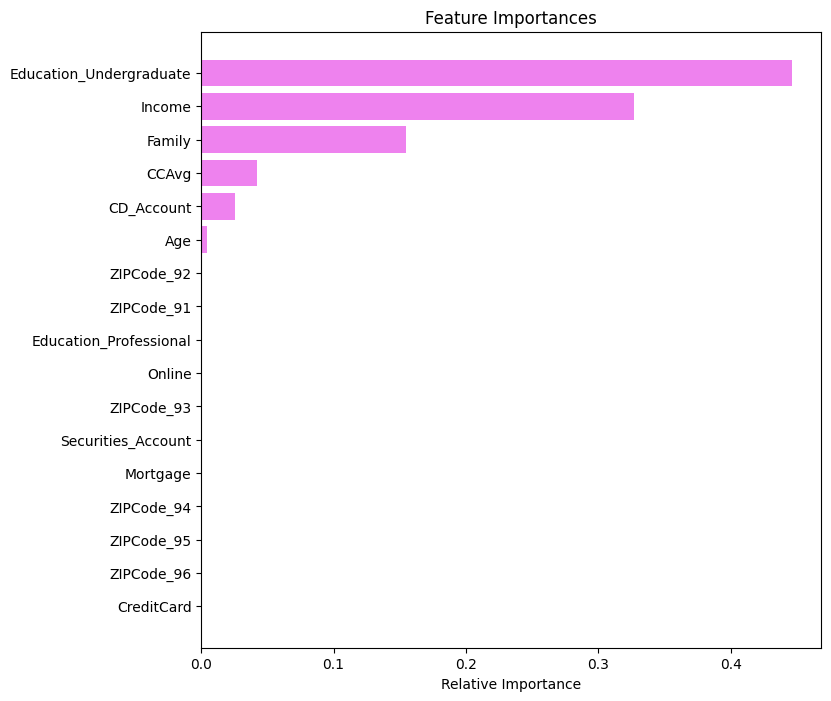

In [ ]:
# Graph of feature importance for the pre-pruned decision tree
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations from the Pre-Pruned Tree**

* Undergraduate Education is the most important feature in this model, followed by income, then family size.

### **Cost-Complexity Pruning**

In [ ]:
# identifying the best alpha values to prune the decision tree effectively, balancing between simplicity and accuracy
clf = DecisionTreeClassifier(random_state=1) #initializes a Decision Tree Classifier with a specified random state.
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities # returns the effective alphas and corresponding total impurities

In [ ]:
#DataFrame showing values of the effective alphas and corresponding total impurities obtained from the cost complexity pruning path
pd.DataFrame(path)

ccp_alphas  impurities
0      0.00000     0.00000
1      0.00021     0.00043
2      0.00022     0.00154
3      0.00024     0.00275
4      0.00027     0.00382
5      0.00036     0.00490
6      0.00038     0.00528
7      0.00038     0.00566
8      0.00038     0.00604
9      0.00038     0.00642
10     0.00044     0.00686
11     0.00048     0.00733
12     0.00053     0.00786
13     0.00058     0.01018
14     0.00058     0.01076
15     0.00062     0.01138
16     0.00077     0.01446
17     0.00088     0.01798
18     0.00155     0.01954
19     0.00233     0.02187
20     0.00302     0.02489
21     0.00329     0.02819
22     0.00647     0.03466
23     0.02387     0.05853
24     0.05636     0.17126

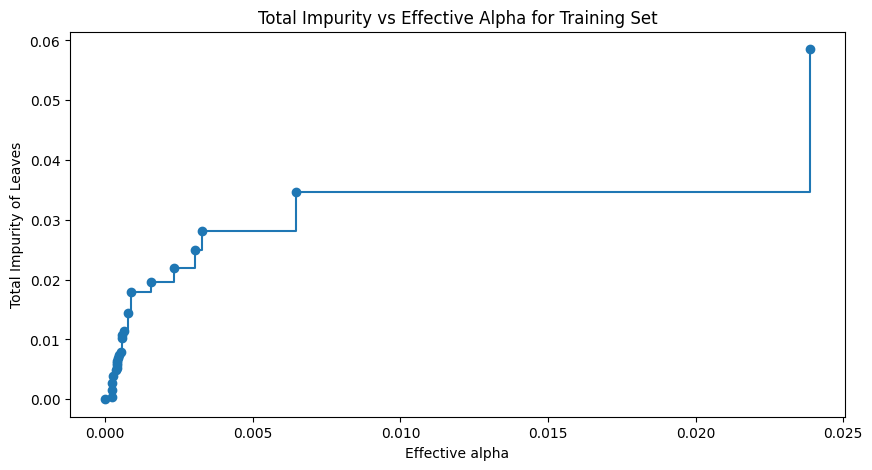

In [ ]:
# Graph showing total impurity vs effective alpha for training set
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total Impurity of Leaves")
ax.set_title("Total Impurity vs Effective Alpha for Training Set")
plt.show()

 * The impurity values increase as the alpha values increase, indicating that the decision tree becomes more complex with higher alpha values.

**Train Data Using effective alphas**



*   We will train the decision tree using the effective alphas. The last value in ccp_alphas is the alpha value the prunes the whole tree, leaving the tree cfls[-1], with one node.


In [ ]:
# training the decision tree using effective alphas and looking at the # of nodes in the last tree
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1] ))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

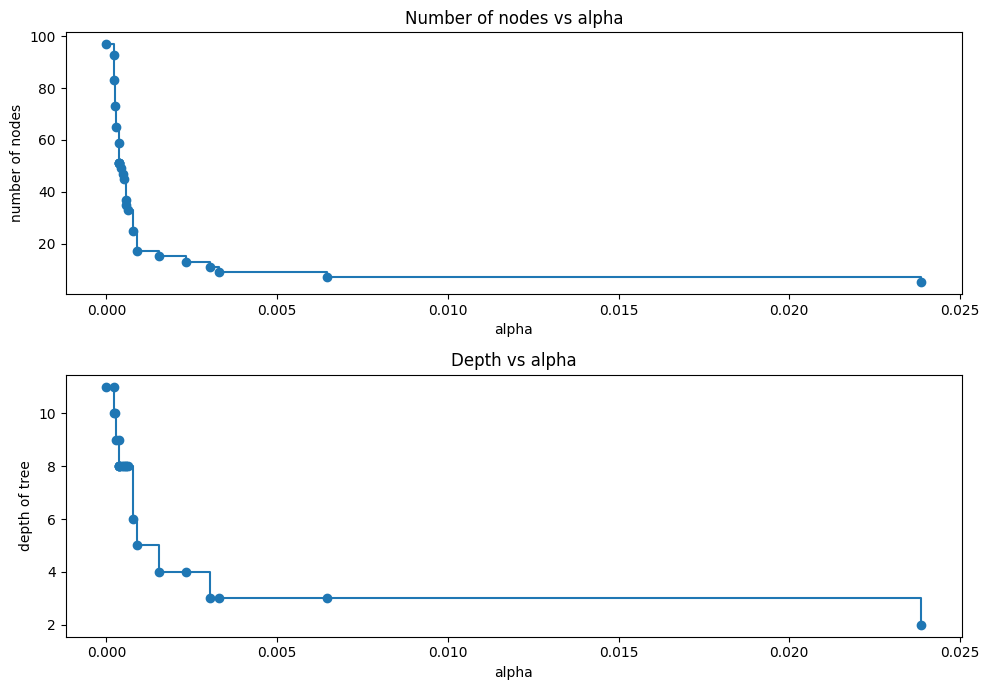

In [ ]:
#visualize the relationship between the complexity parameter (alpha) and the number of nodes and the depth of the decision tre
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

#number of nodes vs alpha
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")

#depth vs alpha
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

* The number of nodes vs alpha graph shows how the number of nodes in the decision tree changes as the complexity parameter (alpha) varies. It helps us understand how pruning affects the size of the decision tree. As the number of nodes decreases, the alpha increases from 0.

* The depth vs alpha graph illustrates how the depth of the decision tree changes with different values of alpha. It helps us understand the trade-off between tree depth and complexity parameter. As the depth of the tree decreases and gets closer to 0, the alpha value increases.

**Recall vs Alpha for Training and Testing Sets**

In [ ]:
# calculate the recall scores for both the training and testing datasets across different decision tree classifiers
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
# gives the accuracy score of the model
train_scores = [clf.score(X_train,y_train) for clf in clfs]
test_scores = [clf.score(X_test,y_test) for clf in clfs]
print(train_scores)
print(test_scores)

[1.0, 0.9997142857142857, 0.9991428571428571, 0.9985714285714286, 0.998, 0.9974285714285714, 0.9962857142857143, 0.9962857142857143, 0.9962857142857143, 0.9962857142857143, 0.996, 0.9957142857142857, 0.9954285714285714, 0.994, 0.9937142857142857, 0.9931428571428571, 0.9914285714285714, 0.9897142857142858, 0.9885714285714285, 0.9871428571428571, 0.9822857142857143, 0.9822857142857143, 0.9822857142857143, 0.9688571428571429]
[0.9813333333333333, 0.982, 0.982, 0.9806666666666667, 0.9806666666666667, 0.9813333333333333, 0.9813333333333333, 0.9813333333333333, 0.9813333333333333, 0.9813333333333333, 0.982, 0.982, 0.982, 0.9833333333333333, 0.9826666666666667, 0.984, 0.9826666666666667, 0.9813333333333333, 0.9813333333333333, 0.98, 0.9753333333333334, 0.9753333333333334, 0.9753333333333334, 0.962]


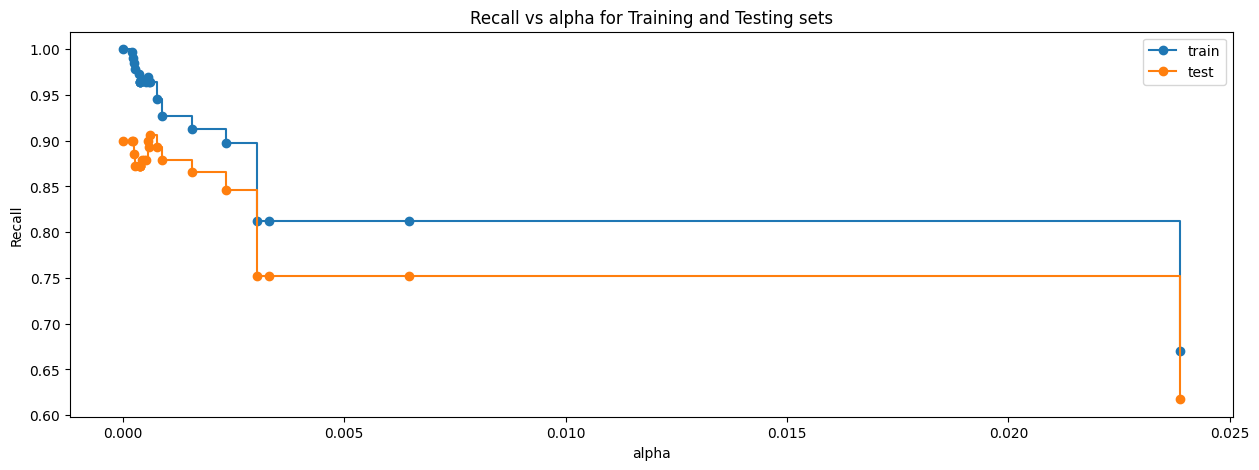

In [ ]:
# visualization of recall score vs alpha for training and testing tests
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for Training and Testing sets")
# plotting the recall scores on the training set as alpha varies
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
# plotting the recall scores on the testing set as alpha varies
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

* A higher recall indicates better performance in correctly identifying positive cases.

* As alpha increases, the decision tree becomes simpler, with fewer nodes and less complexity.

* The train data starts from 100% recall, therefore starting from the overfit model.

* Therefore, we want to identify the model that achieves high recall on both the training and testing sets without overfitting to the training data.

In [ ]:
# creating the model where we get the highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)


### **Post-Pruning**

In [ ]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=0.0006209286209286216, class_weight={0: 0.15, 1: 0.85}, random_state=1         ## Complete the code by adding the correct ccp_alpha value
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

**Checking Performance on Training Data**

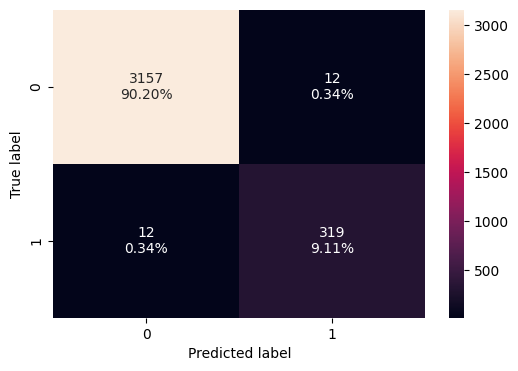

In [ ]:
# confusion matrix for train data (post-pruing)
confusion_matrix_sklearn(best_model, X_train,y_train)

In [ ]:
# checking model performance on train data (post-pruning)
decision_tree_tune_post_train = model_performance_classification_sklearn(best_model, X_train,y_train)
decision_tree_tune_post_train

Accuracy  Recall  Precision      F1
0   0.99314 0.96375    0.96375 0.96375

**Checking Performance on Test Data**

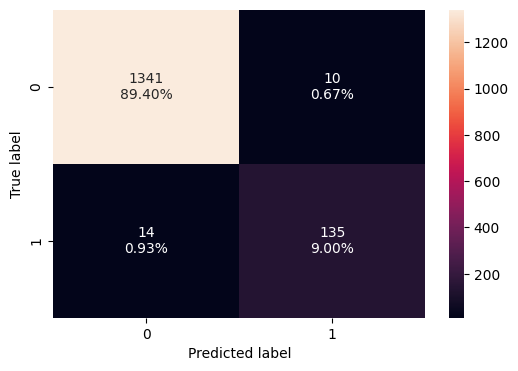

In [ ]:
# confusion matrix for test data (post-pruning)
confusion_matrix_sklearn(best_model, X_test,y_test)

In [ ]:
# checking model performance on test data (post-pruning)
decision_tree_tune_post_test = model_performance_classification_sklearn(best_model, X_test,y_test)
decision_tree_tune_post_test

Accuracy  Recall  Precision      F1
0   0.98400 0.90604    0.93103 0.91837

**Observations on Train vs Test data for Post-Pruning**

* The model performs slightly worse on the test data compared to the training data, which is expected but still maintains high accuracy and precision.

* The recall drops from 96% on the training data, to 90.6% on the test data, indicating that the model may miss some instances of positive cases (customers who actually take a loan) when applied to unseen data, but generally gets most of them right.

* However, the precision and F1 score remain relatively high on both training and test data, indicating good overall performance even after post-pruning. This is also the highest recall score on the test data that we have seen compared to the other models, and recall score is what we are aiming for here.

**Visualizing the Decision Tree**

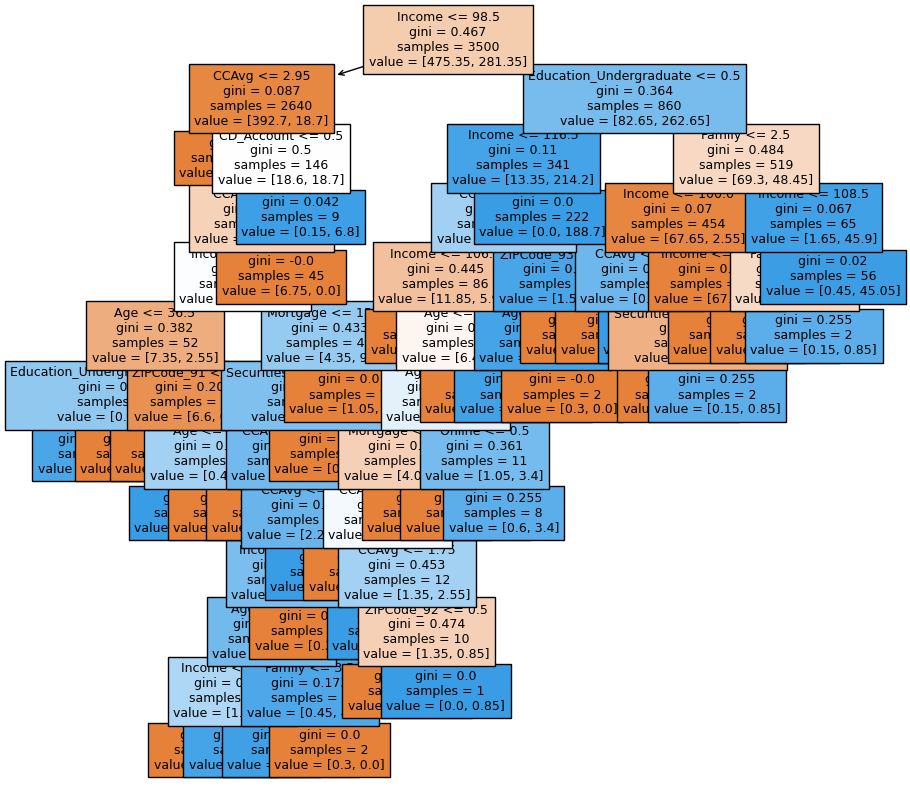

In [ ]:
# visualization of the decision tree
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.15, 1.70] class: 1
|   |   |   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode_91 <= 0.50
|   |   |   |   |   |   |   |--- weights: [6.15, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_91 >  0.50
|   |   |   |   |   |   |   |--- Age <= 46.00
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- Age >  46.00
|   |   |   |   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- Mortgage <=

####**Decision Tree Rules:**

Rules 1) Income <= $98,500:

* If they spend less than 2,950 on credit cards per month, the model predicts they won't buy a personal loan.
* If they spend more than 2,950 on credit cards and don't have a CD account, the model considers additional factors like income, age, education, mortgage, and securities account.

2) Income > $98,500:

* If they do not have an undergraduate degree and earn less than or equal to $116,500, predictions are based on factors like credit card spending, income, age, mortgage, and online usage.
* If they have an undergraduate degree, predictions are made based on family size and income.




In [ ]:
# importance of features in the tree building
print(pd.DataFrame(estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns).sort_values(by="Imp", ascending=False))

                            Imp
Income                  0.60221
Family                  0.14415
Education_Undergraduate 0.12733
CCAvg                   0.08468
Age                     0.01193
CD_Account              0.01117
Mortgage                0.00493
Securities_Account      0.00479
ZIPCode_92              0.00300
ZIPCode_91              0.00264
Online                  0.00168
ZIPCode_93              0.00151
ZIPCode_94              0.00000
ZIPCode_95              0.00000
ZIPCode_96              0.00000
Education_Professional  0.00000
CreditCard              0.00000


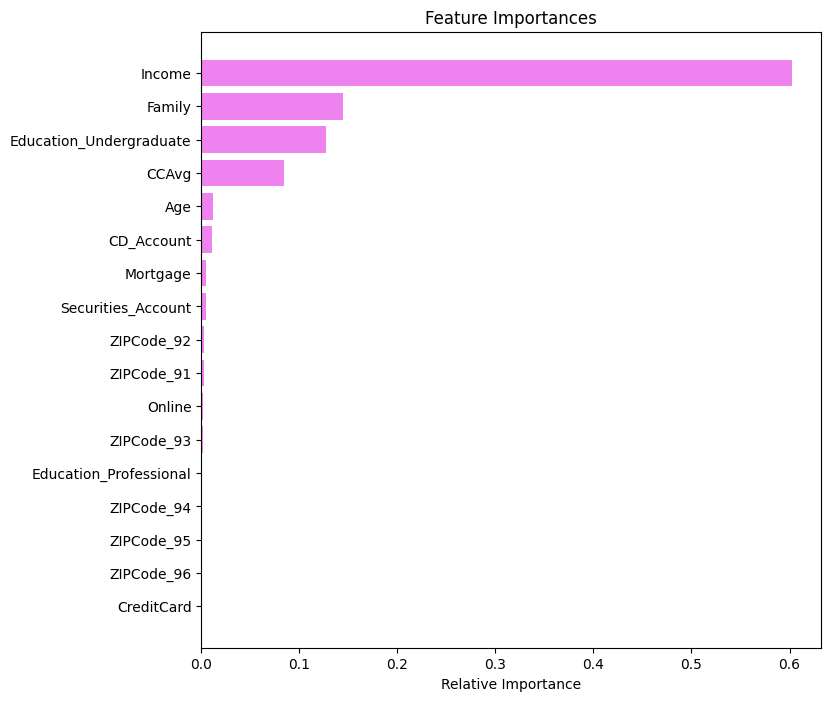

In [ ]:
# adding importance features
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

# graph of importance features
plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* Income is the most important feature for building the tree, contributing 60% to the decision-making process, followed by family size which contributes 14%.

* Therefore, when the decision tree is deciding whether a customer will buy a personal loan or not, it mostly looks at their income first, then their family size, and so on. Other factors like age and having a CD account have less of an influence.


**Conclusions:**

* These observations are different than those of the pre-pruned model. The decision tree rules of the pre-pruned model show that the income is the most important feature (the same as post-pruned).
* However, the pre-pruned model has Undergraduate Education as the second most important feature, while this model has the family size as the most important feature.
* There is also a pretty large increase on the weight of income in this model, with other features becoming less important.
* The post-pruned set of rules considers a broader range of factors like income and education, while the post-pruned rules focus more on income and credit card spending thresholds.

### Model Performance Improvement

## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T,decision_tree_tune_post_train.T], axis=1,)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 1.00000                      0.99029   
Recall                   1.00000                      0.92749   
Precision                1.00000                      0.96845   
F1                       1.00000                      0.94753   

           Decision Tree (Post-Pruning)  
Accuracy                        0.99314  
Recall                          0.96375  
Precision                       0.96375  
F1                              0.96375

* The Decision Tree model built using sklearn achieves perfect accuracy, recall, precision, and F1 score of 1.00, indicating that it perfectly fits the training data. However, this may suggest potential overfitting, as the model may not generalize well to unseen data.

* The Decision Tree with Pre-Pruning exhibits slightly lower performance metrics compared to the sklearn model, with accuracy at .99, recall at .93, precision at .97, and F1 score at .95. This suggests that applying pre-pruning techniques has helped to reduce overfitting and improve generalization.

* Similarly, the Decision Tree with Post-Pruning also shows slightly lower performance metrics compared to the sklearn model, but performs better than the pre-pruning in recall and F1 score. It performs slightly worse in precision than pre-pruning, but not significantly. Post-pruning appears to have effectively dealt with overfitting, resulting in a model that works well on new data.

* Overall, while the sklearn Decision Tree model achieves perfect performance on the training data, the pre-pruned and post-pruned models demonstrate slightly lower but still excellent performance metrics, indicating effective regularization techniques to prevent overfitting.

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T,decision_tree_tune_post_test.T], axis=1,)
models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)","Decision Tree (Post-Pruning)"]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                 0.98133                      0.98000   
Recall                   0.89933                      0.86577   
Precision                0.91156                      0.92806   
F1                       0.90541                      0.89583   

           Decision Tree (Post-Pruning)  
Accuracy                        0.98400  
Recall                          0.90604  
Precision                       0.93103  
F1                              0.91837

Based on the testing performance comparison:

* All three decision tree models demonstrate high accuracy, with scores around 98%. This suggests that they perform well in correctly classifying instances.

* In terms of recall, which measures the ability to correctly identify positive instances, the post-pruned decision tree outperforms the others slightly, achieving a score of 90.6%. This means it can correctly identify 90.6% of the customers who will accept a personal loan.

* Precision, which indicates the accuracy of positive predictions, is consistently high across all models, with scores ranging from 91% to 93%, but the highest is in the post-pruning model.

* The F1 score, which considers both precision and recall, also reflects the strong performance of all models, with scores ranging from 90% to 92%, but the highest F1 score is in the post-pruning model.

**Conclusion:**
* Overall, the post-pruned decision tree outperformed the other two trees on all metrics. Therefore, this is the best model for the business to use.


## Actionable Insights and Business Recommendations


### **Insights:**


* **Annual Income:** Income is the most significant factor influencing the likelihood of accepting a personal loan. Customers with higher incomes are more likely to accept loan offers, suggesting they might have greater financial stability or purchasing power.
* **Family Size:** Family size also plays a notable role in predicting loan acceptance. Customers with larger families may have higher financial responsibilities or expenses, making them more inclined to consider personal loans for various purposes, such as education expenses, home improvements, or major purchases.
* **Education Level:** The level of education, particularly undergraduate education, is an important determinant of loan acceptance. This suggests that customers with undergraduate degrees may have specific financial needs or goals that make them more receptive to personal loan offers, such as tuition payment or other educational expenses.
* **Spending Habits:** Average spending on credit cards (CCAvg) also influences loan acceptance, while it is to a lesser extent compared to income and family size. Customers who spend more on credit cards per month may be more comfortable with borrowing and managing money, making them potentially more open to personal loan options.
* **Age and Mortgage:** While age and mortgage values also contribute to predicting loan acceptance, their importance is relatively lower compared to other factors. This implies that factors such as income, family size, education, and spending habits have a stronger influence on customers' decision-making regarding personal loans.



### **Recommendations:**
1) **Tarket Marketing:** Focus marketing efforts on customers with higher incomes, larger families, and those with an undergraduate education. These segments show a higher probability of purchasing personal loans, as indicated by the model.

2) **Personal Campaigns:** Develop personalized campaigns that highlight the benefits of personal loans for customers in the identified segments. This could include promotional offers, flexible refinancing options, and exclusive benefits for AllLife Bank customers.

3) **Financial Education:** Provide resources and educational materials to help customers understand the advantages of personal loans and how they can be used effectively. Many customers likely don't even know the advantages of personal loans. Focus on addressing common misconceptions and concerns about borrowing, particularly among segments with lower importance features like Age and Mortgage.

4) **Build Relationships with Customers:** Ask your bankers to make a real effort at getting to know their customer on a more personal level. For example, if the banker is aware that a customer is getting married soon, they may have wedding or travel expenses. If they are about to have a child, they may need a loan for purchasing a new home or expanding their current home.

5) **Cross-Selling Opportunities:** Leverage existing relationships with customers who have securities accounts or CD accounts to sell personal loans. Because these customers already have a trusting relationship with the bank, they may be more receptive to additional financial offerings.

6) **Online Presence:** Enhance the bank's online platform to streamline the application process for personal loans. Invest in user-friendly interfaces and tools that make it easy for customers to learn about loan offerings and submit applications online. Additionally, promote the convenience and security of online banking facilities to attract tech-savvy customers.


###**Conclusion:**

By incorporating these recommendations and aligning marketing strategies with the insights provided by the model's feature importance analysis, AllLife Bank can effectively target and attract potential new customers, ultimately increasing the success rate of personal loan conversions.





___

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

Saving ML_Full_Code_notebook (2).ipynb to ML_Full_Code_notebook (2).ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>